## Imports

In [1]:
from pathlib import Path
import pandas as pd
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

## Configs

In [2]:
ccee_data_path = Path(r'..\..\01_dados\dados_ccee')
ccee_merged_data_path = Path(r'..\..\01_dados\dados_ccee_merged')
ons_data_path = Path(r'..\..\01_dados\dados_ons')
ons_merged_data_path = Path(r'..\..\01_dados\dados_ons_merged')
save_data_path = Path(r'..\..\01_dados\dados_biomassa_x_dados_ons')

warnings.filterwarnings('ignore')

## Busca por algo relevante

In [3]:
df_ccee = pd.read_csv(ccee_merged_data_path / 'biomassa/biomassa.csv', encoding='utf-8')

In [4]:
df_ccee.head(5)

Cód. Da Parcela de Usina Sigla da Usina               Fonte Submercado  \
0                     287.0   SERRA GRANDE  Térmica a Biomassa   NORDESTE   
1                     287.0   SERRA GRANDE  Térmica a Biomassa   NORDESTE   
2                     287.0   SERRA GRANDE  Térmica a Biomassa   NORDESTE   
3                     287.0   SERRA GRANDE  Térmica a Biomassa   NORDESTE   
4                     287.0   SERRA GRANDE  Térmica a Biomassa   NORDESTE   

   Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0                                                0.0         
1                                                0.0         
2                                                0.0         
3                                                0.0         
4                                                0.0         

   Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                1.0                
1                                                1.0                
2                                                1.0                
3                                                1.0                
4                                                1.0                

   Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                1.0     
1                                                1.0     
2                                                1.0     
3                                                1.0     
4                                                1.0     

   Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)  \
0                                                0.0                                            
1                                                0.0                                            
2                                                0.0                                            
3                                                0.0                                            
4                                                0.0                                            

   Fator de Deslocamento Hidráulico (F_DHp,j) -   \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

   Despacho Sem Restrição Energética Ex-ante (XA_ETp,j) - MWh  \
0                                                NaN            
1                                                NaN            
2                                                NaN            
3                                                NaN            
4                                                NaN            

   Geração Fora da  Ordem de Mérito (GFOMp,j) - MWh  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

   Despacho por Ordem de Mérito (DOMP_ONSp,j) - MWh  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

   Preço para valoração do encargo para manutenção de reserva de potência operativa (PREÇO_RESPOPp,j)  \
0                                                NaN                                                    
1                                                NaN                                                    
2                                                NaN                                                    
3                                 

In [5]:
nan_percentages = df_ccee.isna().mean() * 100

print("NaN percentages per column:")
print(nan_percentages)

NaN percentages per column:
Cód. Da Parcela de Usina                                                                                6.388698
Sigla da Usina                                                                                          6.388698
Fonte                                                                                                   0.000000
Submercado                                                                                              0.000000
Geração no Centro de Gravidade - MW médios (Gp,j) - MWh                                                 0.000000
Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)                                          0.000000
Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*                                                     0.000000
Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)              0.000000
Fator de Deslocamento Hidráulico (F_DHp,j) -                        

vamos excluir as colunas com 100% de na values

In [6]:
cols_to_drop = [
    'Despacho Sem Restrição Energética Ex-ante (XA_ETp,j) - MWh',
    'Fator de Deslocamento Hidráulico (F_DHp,j) - ',
    'Preço para valoração do encargo para manutenção de reserva de potência operativa (PREÇO_RESPOPp,j)',
    'Garantia Física  Modulada Ajustada pelo Fator de Disponibilidade (GFIS_2p,j) - MWh',
    'Disponibilidade Verificada da Unidade Geradora (DVi,j) - MWh',
    'Despacho Sem Restrição Energática Ex-ante (XA_ETp,j) - MWh',
    'Geração Fora da  Ordem de Mérito (GFOMp,j) - MWh',
    'Despacho por Ordem de Mérito (DOMP_ONSp,j) - MWh'
]

df_ccee.drop(cols_to_drop, axis=1, inplace=True)

In [7]:
df_ccee[df_ccee['Cód. Da Parcela de Usina'] != df_ccee['Cód. Da Parcela de Usina']]

Cód. Da Parcela de Usina Sigla da Usina               Fonte  \
2247888                       NaN            NaN  Térmica a Biomassa   
2247889                       NaN            NaN  Térmica a Biomassa   
2247890                       NaN            NaN  Térmica a Biomassa   
2247891                       NaN            NaN  Térmica a Biomassa   
2247892                       NaN            NaN  Térmica a Biomassa   
...                           ...            ...                 ...   
2668243                       NaN            NaN  Térmica a Biomassa   
2668244                       NaN            NaN  Térmica a Biomassa   
2668245                       NaN            NaN  Térmica a Biomassa   
2668246                       NaN            NaN  Térmica a Biomassa   
2668247                       NaN            NaN  Térmica a Biomassa   

        Submercado  Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
2247888   NORDESTE                                           0.000000         
2247889   NORDESTE                                           0.000000         
2247890   NORDESTE                                           0.000000         
2247891   NORDESTE                                           0.000000         
2247892   NORDESTE                                           0.000000         
...            ...                                                ...         
2668243      NORTE                                           4.400162         
2668244      NORTE                                           4.817794         
2668245      NORTE                                           4.263554         
2668246      NORTE                                           4.868800         
2668247      NORTE                                           4.892321         

         Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
2247888                                                1.0                
2247889                                                1.0                
2247890                                                1.0                
2247891                                                1.0                
2247892                                                1.0                
...                                                    ...                
2668243                                                1.0                
2668244                                                1.0                
2668245                                                1.0                
2668246                                                1.0                
2668247                                                1.0                

         Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
2247888                                                1.0     
2247889                                                1.0     
2247890                                                1.0     
2247891                                                1.0     
2247892                                                1.0     
...                                                    ...     
2668243                                                1.0     
2668244                                                1.0     
2668245                                                1.0     
2668246                                                1.0     
2668247                                                1.0     

         Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)  \
2247888                                                0.0                                            
2247889                                                0.0                                            
2247890                                                0.0                                            
2247891                                                0.0                                            
2247892   

identifiquei que o cod parcela nada mais é do que o cod da parcela usina onde existe na values, vou corrigir isso

In [8]:
df_ccee['Cód. Da Parcela de Usina'].fillna(df_ccee['Cód. Parcela - Usina'], 
                                                           inplace=True)
df_ccee['Sigla da Usina'].fillna(df_ccee['Sigla Parcela - Usina'], 
                                                 inplace=True)

df_ccee.drop(['Cód. Parcela - Usina', 'Sigla Parcela - Usina'], 
                             inplace=True,
                             axis=1)

In [9]:
df_ccee.Submercado.unique()

array(['NORDESTE', 'SUDESTE', 'SUL', 'NORTE'], dtype=object)

Agora fazer um dicionário para padronizar o a coluna submercado com as colunas da ONS

In [10]:
sub_mercado_dict = {
    'NORDESTE':'NE',
    'NORTE':'N',
    'SUDESTE':'SE',
    'SUL':'S'
}

df_ccee['id_subsistema'] = df_ccee.Submercado.apply(lambda x: sub_mercado_dict[x])

In [11]:
df_ccee['din_instante'] = pd.to_datetime(df_ccee['din_instante'])

In [12]:
df_ccee.head()

Cód. Da Parcela de Usina Sigla da Usina               Fonte Submercado  \
0                     287.0   SERRA GRANDE  Térmica a Biomassa   NORDESTE   
1                     287.0   SERRA GRANDE  Térmica a Biomassa   NORDESTE   
2                     287.0   SERRA GRANDE  Térmica a Biomassa   NORDESTE   
3                     287.0   SERRA GRANDE  Térmica a Biomassa   NORDESTE   
4                     287.0   SERRA GRANDE  Térmica a Biomassa   NORDESTE   

   Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0                                                0.0         
1                                                0.0         
2                                                0.0         
3                                                0.0         
4                                                0.0         

   Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                1.0                
1                                                1.0                
2                                                1.0                
3                                                1.0                
4                                                1.0                

   Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                1.0     
1                                                1.0     
2                                                1.0     
3                                                1.0     
4                                                1.0     

   Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)  \
0                                                0.0                                            
1                                                0.0                                            
2                                                0.0                                            
3                                                0.0                                            
4                                                0.0                                            

         din_instante id_subsistema  
0 2020-04-01 00:00:00            NE  
1 2020-04-01 01:00:00            NE  
2 2020-04-01 02:00:00            NE  
3 2020-04-01 03:00:00            NE  
4 2020-04-01 04:00:00            NE

In [13]:
df_ccee

Cód. Da Parcela de Usina       Sigla da Usina               Fonte  \
0                           287.0         SERRA GRANDE  Térmica a Biomassa   
1                           287.0         SERRA GRANDE  Térmica a Biomassa   
2                           287.0         SERRA GRANDE  Térmica a Biomassa   
3                           287.0         SERRA GRANDE  Térmica a Biomassa   
4                           287.0         SERRA GRANDE  Térmica a Biomassa   
...                           ...                  ...                 ...   
6579739                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579740                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579741                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579742                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579743                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   

        Submercado  Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0         NORDESTE                                                0.0         
1         NORDESTE                                                0.0         
2         NORDESTE                                                0.0         
3         NORDESTE                                                0.0         
4         NORDESTE                                                0.0         
...            ...                                                ...         
6579739    SUDESTE                                                0.0         
6579740    SUDESTE                                                0.0         
6579741    SUDESTE                                                0.0         
6579742    SUDESTE                                                0.0         
6579743    SUDESTE                                                0.0         

         Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                      1.0                
1                                                      1.0                
2                                                      1.0                
3                                                      1.0                
4                                                      1.0                
...                                                    ...                
6579739                                                1.0                
6579740                                                1.0                
6579741                                                1.0                
6579742                                                1.0                
6579743                                                1.0                

         Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                 1.000000     
1                                                 1.000000     
2                                                 1.000000     
3                                                 1.000000     
4                                                 1.000000     
...                                                    ...     
6579739                                           0.975016     
6579740                                           0.974504     
6579741                                           0.974388     
6579742                                           0.974447     
6579743                                           0.974293     

         Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)  \
0                                                      0.0                                            
1                                                      0.0                                            
2                                                      0.0                                            
3                                        

### Primeiro Merge - balanco-energia-dessem 

In [14]:
dados_ons = pd.read_csv(ons_merged_data_path / 'balanco-energia-dessem/balanco-energia-dessem.csv', sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons

id_subsistema         din_instante  val_demanda  \
0                 NE  2020-01-01 00:00:00     10234.99   
1                  N  2020-01-01 00:00:00      5140.64   
2                 SE  2020-01-01 00:00:00     31281.76   
3                  S  2020-01-01 00:00:00      9984.74   
4                 NE  2020-01-01 00:30:00     10267.97   
...              ...                  ...          ...   
238843             S  2023-06-29 23:00:00     11000.79   
238844            NE  2023-06-29 23:30:00     12084.37   
238845             N  2023-06-29 23:30:00      7659.73   
238846            SE  2023-06-29 23:30:00     37739.57   
238847             S  2023-06-29 23:30:00     10347.95   

        val_geracaohidraulicamwmed  val_geracaopchmwmed  \
0                          2679.23                 45.0   
1                          4484.11                  7.0   
2                         30415.20               1390.0   
3                          2157.19                500.0   
4                          2676.61                 45.0   
...                            ...                  ...   
238843                     6595.32                940.0   
238844                     1648.90                113.0   
238845                     8178.15                 50.0   
238846                    32318.45               1892.0   
238847                     5880.75                940.0   

        val_geracaotermicamwed  val_geracaopctmwmed  val_geracaoeolicamwmed  \
0                      2148.90                330.0                  1497.0   
1                      2785.00                  0.0                    72.0   
2                      6713.00                725.0                     4.0   
3                      1378.00                282.0                   626.0   
4                      2128.40                337.0                  1437.0   
...                        ...                  ...                     ...   
238843                  606.00                116.0                   377.0   
238844                    3.00                318.0                 13733.0   
238845                 1147.17                 41.0                   236.0   
238846                 2776.50               3031.0                     5.0   
238847                  606.00                121.0                   408.0   

        val_geracaofotovoltaicamwmed  
0                                0.0  
1                                NaN  
2                                0.0  
3                                0.0  
4                                0.0  
...                              ...  
238843                           0.0  
238844                           0.0  
238845                           0.0  
238846                           0.0  
238847                           0.0  

[238848 rows x 9 columns]

In [15]:
na_count_per_column = dados_ons.isna().sum()
print(na_count_per_column)

id_subsistema                       0
din_instante                        0
val_demanda                         0
val_geracaohidraulicamwmed          0
val_geracaopchmwmed               190
val_geracaotermicamwed              0
val_geracaopctmwmed               155
val_geracaoeolicamwmed             82
val_geracaofotovoltaicamwmed    35274
dtype: int64


Perguntar para o Roberto qual melhor forma de preencher valores nulos no caso das variáveis acima para não prejudicar o sentido físico.

por enquanto preencheremos com 0.

In [16]:
dados_ons.fillna(0, inplace=True)

Agora vamos trazer os dados de meia em meia hora e somá-los para tornar dados horários

In [17]:
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])

dados_ons['din_instante'] = dados_ons['din_instante'].dt.floor('H')

# now group by the rounded date and 'id' and perform the sum
result_df = dados_ons.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

In [18]:
result_df

id_subsistema        din_instante  val_demanda  \
0                  N 2020-01-01 00:00:00     10294.20   
1                  N 2020-01-01 01:00:00     10350.33   
2                  N 2020-01-01 02:00:00     10373.14   
3                  N 2020-01-01 03:00:00     10315.36   
4                  N 2020-01-01 04:00:00     10226.30   
...              ...                 ...          ...   
119419            SE 2023-06-29 19:00:00     95027.95   
119420            SE 2023-06-29 20:00:00     92604.79   
119421            SE 2023-06-29 21:00:00     89980.35   
119422            SE 2023-06-29 22:00:00     84128.71   
119423            SE 2023-06-29 23:00:00     77216.82   

        val_geracaohidraulicamwmed  val_geracaopchmwmed  \
0                          8937.90                 14.0   
1                          8753.13                 14.0   
2                          8642.72                 14.0   
3                          8436.98                 14.0   
4                          8231.91                 16.0   
...                            ...                  ...   
119419                    73076.60               3866.0   
119420                    70952.28               3858.0   
119421                    70029.34               3829.0   
119422                    68156.67               3813.0   
119423                    65816.52               3791.0   

        val_geracaotermicamwed  val_geracaopctmwmed  val_geracaoeolicamwmed  \
0                       5570.0                  0.0                   147.0   
1                       5572.0                  0.0                   152.0   
2                       5580.0                  0.0                   152.0   
3                       5580.0                  0.0                   155.0   
4                       5580.0                  0.0                   163.0   
...                        ...                  ...                     ...   
119419                  5553.0               5999.0                    10.0   
119420                  5553.0               6021.0                    10.0   
119421                  5553.0               6034.0                    10.0   
119422                  5553.0               6057.0                    10.0   
119423                  5553.0               6062.0                    10.0   

        val_geracaofotovoltaicamwmed  
0                                0.0  
1                                0.0  
2                                0.0  
3                                0.0  
4                                0.0  
...                              ...  
119419                           0.0  
119420                           0.0  
119421                           0.0  
119422                           0.0  
119423                           0.0  

[119424 rows x 9 columns]

In [19]:
df_final = pd.merge(df_ccee,
                    result_df,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

Cód. Da Parcela de Usina       Sigla da Usina               Fonte  \
0                           287.0         SERRA GRANDE  Térmica a Biomassa   
1                           287.0         SERRA GRANDE  Térmica a Biomassa   
2                           287.0         SERRA GRANDE  Térmica a Biomassa   
3                           287.0         SERRA GRANDE  Térmica a Biomassa   
4                           287.0         SERRA GRANDE  Térmica a Biomassa   
...                           ...                  ...                 ...   
6579739                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579740                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579741                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579742                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579743                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   

        Submercado  Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0         NORDESTE                                                0.0         
1         NORDESTE                                                0.0         
2         NORDESTE                                                0.0         
3         NORDESTE                                                0.0         
4         NORDESTE                                                0.0         
...            ...                                                ...         
6579739    SUDESTE                                                0.0         
6579740    SUDESTE                                                0.0         
6579741    SUDESTE                                                0.0         
6579742    SUDESTE                                                0.0         
6579743    SUDESTE                                                0.0         

         Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                      1.0                
1                                                      1.0                
2                                                      1.0                
3                                                      1.0                
4                                                      1.0                
...                                                    ...                
6579739                                                1.0                
6579740                                                1.0                
6579741                                                1.0                
6579742                                                1.0                
6579743                                                1.0                

         Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                 1.000000     
1                                                 1.000000     
2                                                 1.000000     
3                                                 1.000000     
4                                                 1.000000     
...                                                    ...     
6579739                                           0.975016     
6579740                                           0.974504     
6579741                                           0.974388     
6579742                                           0.974447     
6579743                                           0.974293     

         Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)  \
0                                                      0.0                                            
1                                                      0.0                                            
2                                                      0.0                                            
3                                        

In [20]:
na_count_per_column = df_final.isna().sum()
print(na_count_per_column)

Cód. Da Parcela de Usina                                                                           0
Sigla da Usina                                                                                     0
Fonte                                                                                              0
Submercado                                                                                         0
Geração no Centro de Gravidade - MW médios (Gp,j) - MWh                                            0
Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)                                     0
Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*                                                0
Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)         0
din_instante                                                                                       0
id_subsistema                                                                              

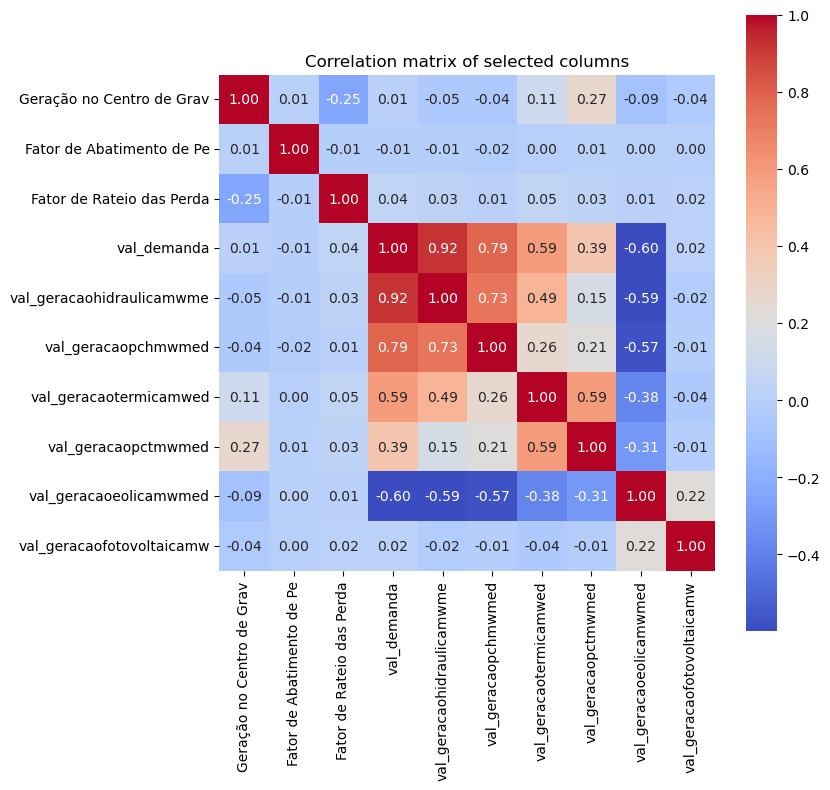

In [21]:
df_subset = df_final[['Geração no Centro de Gravidade - MW médios (Gp,j) - MWh',
                      'Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)',
                      'Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*',
                      'din_instante',
                      'id_subsistema',
                      'val_demanda',
                      'val_geracaohidraulicamwmed',
                      'val_geracaopchmwmed',
                      'val_geracaotermicamwed',
                      'val_geracaopctmwmed',
                      'val_geracaoeolicamwmed',
                      'val_geracaofotovoltaicamwmed']]

# Truncate column names to the first 25 characters
df_subset.columns = [col[:25] for col in df_subset.columns]

# Calculate the correlation matrix
corr = df_subset.corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix of selected columns')
plt.show()

esse foi o gráfico geral, vamos dividir por subsistema para ver se existe alguma relação mais forte, é possível identificar correlação positiva e negativa forte entre os dados da ons e uma pequena correlaçao positiva entre val_geraçãoopct e geração no centro de grav das usinas de biomassa.

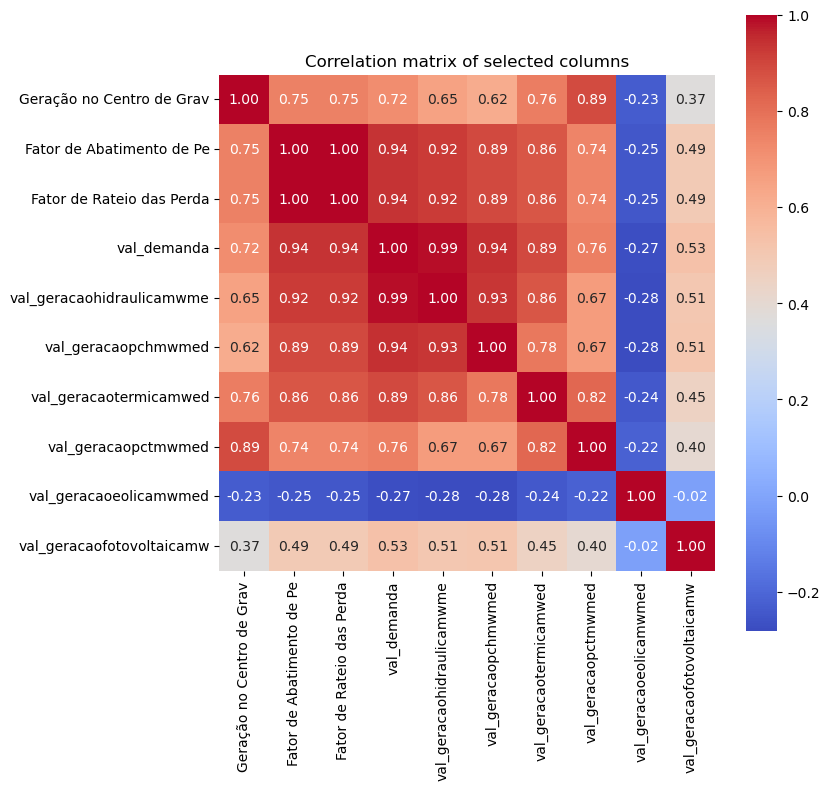

In [22]:
df_subset = df_final[['Geração no Centro de Gravidade - MW médios (Gp,j) - MWh',
                      'Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)',
                      'Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*',
                      'din_instante',
                      'id_subsistema',
                      'val_demanda',
                      'val_geracaohidraulicamwmed',
                      'val_geracaopchmwmed',
                      'val_geracaotermicamwed',
                      'val_geracaopctmwmed',
                      'val_geracaoeolicamwmed',
                      'val_geracaofotovoltaicamwmed']]

df_subset = df_subset.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

# Truncate column names to the first 25 characters
df_subset.columns = [col[:25] for col in df_subset.columns]

# Calculate the correlation matrix
corr = df_subset.corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix of selected columns')
plt.show()

Quando Agrupados por data/hora e subsistema a correlação se mostra muito mais relevante, o mapa de correlação antereior mostra dividido pela granularidade de usina, quando somamos todas as usinas do subsistema a análise se torna mais relevante.

Vamos tentar agora separa por susbstema.

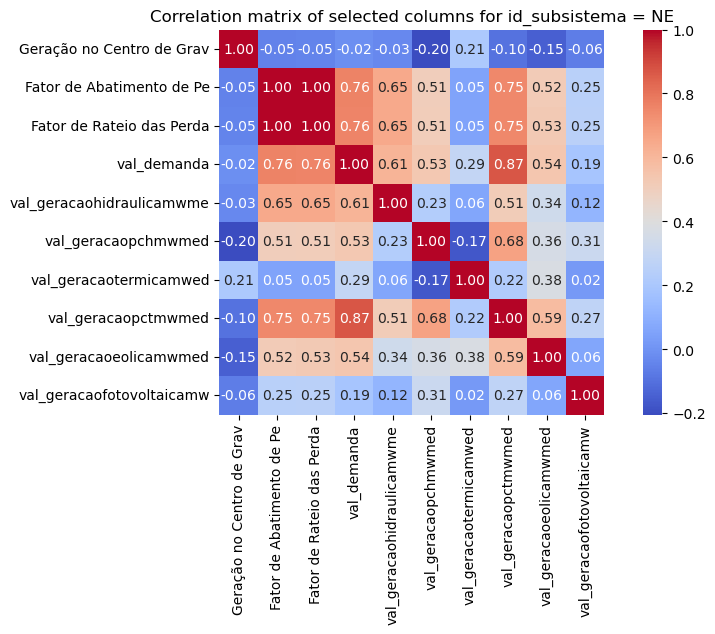

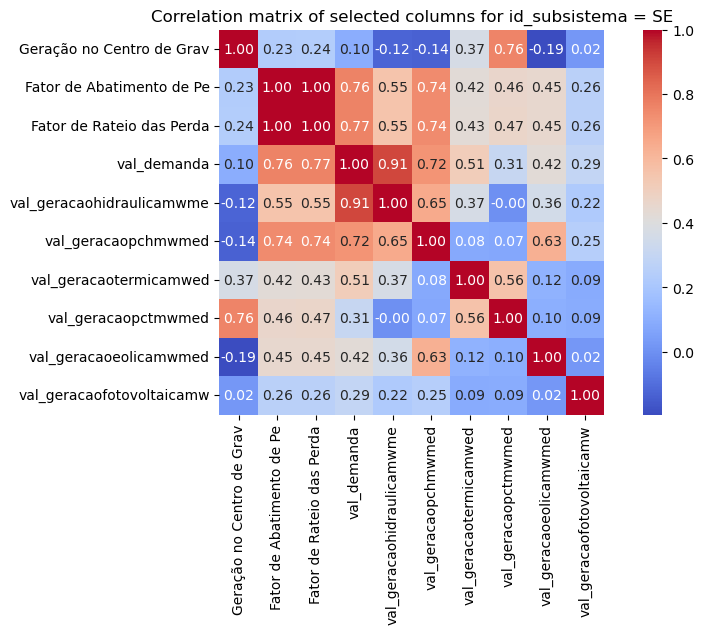

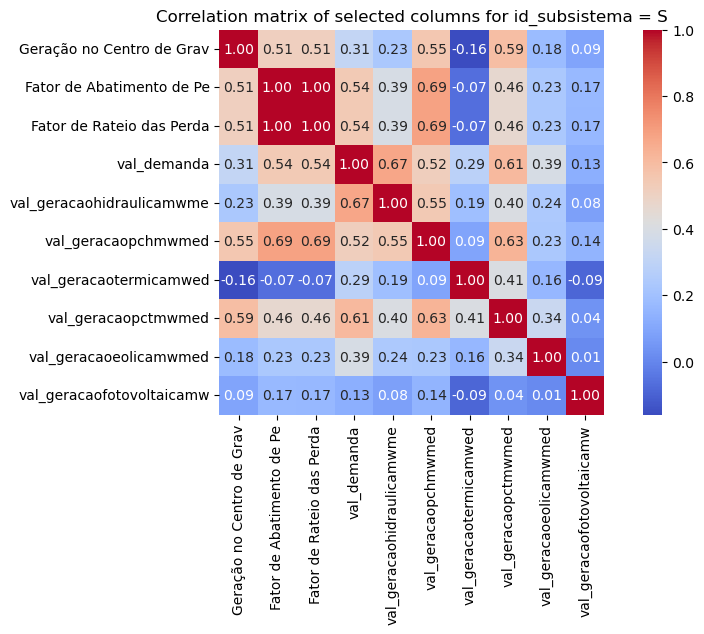

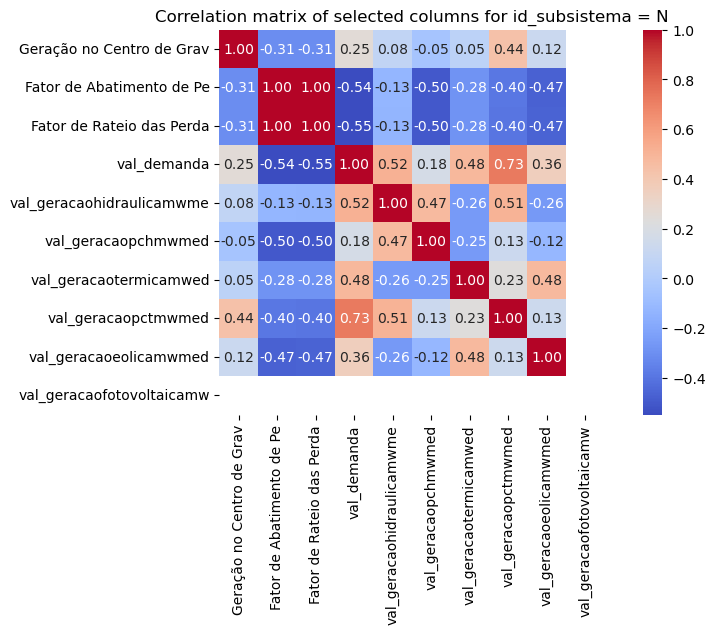

In [23]:
# Get unique values of 'id_subsistema'
ids = df_final['id_subsistema'].unique()

# Loop over unique ids
for id in ids:
    # Subset dataframe for current id
    df_subset = df_final[df_final['id_subsistema'] == id][
        ['Geração no Centro de Gravidade - MW médios (Gp,j) - MWh',
        'Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)',
        'Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*',
        'din_instante',
        'id_subsistema',
        'val_demanda',
        'val_geracaohidraulicamwmed',
        'val_geracaopchmwmed',
        'val_geracaotermicamwed',
        'val_geracaopctmwmed',
        'val_geracaoeolicamwmed',
        'val_geracaofotovoltaicamwmed']
    ]
    
    df_subset = df_subset.groupby(['din_instante']).sum().reset_index()
    
    # Truncate column names to the first 25 characters
    df_subset.columns = [col[:25] for col in df_subset.columns]

    # Calculate the correlation matrix
    corr = df_subset.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(10,5))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title(f'Correlation matrix of selected columns for id_subsistema = {id}')
    plt.show()

quando separado por subsistema o Nordeste e Norte apresentam menos peso, Sul me Sudeste mostram maior correlação entre as variáveis

### Segundo Merge - balanco-energia-subsistema

In [24]:
dados_ons = pd.read_csv(ons_merged_data_path / 'balanco-energia-subsistema/balanco-energia-subsistema.csv', sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons.rename(columns={'id_subsistena':'id_subsistema'},inplace=True)
dados_ons

id_subsistema         din_instante  val_gerhidraulica  val_gertermica  \
0                  NE  2000-01-01 00:00:00        5337.700000        0.000000   
1                   N  2000-01-01 00:00:00        2422.500000        0.000000   
2                 SIN  2000-01-01 00:00:00       31977.000000     2649.100000   
3                  SE  2000-01-01 00:00:00       20479.800000     1418.600000   
4                   S  2000-01-01 00:00:00        3737.000000     1230.500000   
...               ...                  ...                ...             ...   
1029136            NE  2023-06-27 23:00:00        4445.669922      416.807007   
1029137             N  2023-06-27 23:00:00        9119.923828     1675.775024   
1029138           SIN  2023-06-27 23:00:00       48416.371000     9264.440000   
1029139            SE  2023-06-27 23:00:00       26389.136719     6367.804199   
1029140             S  2023-06-27 23:00:00        8461.639648      804.054016   

         val_gereolica  val_gersolar  val_carga  val_intercambio  
0             0.000000         0.000   5340.200           -2.500  
1             0.000000         0.000   2373.700           48.800  
2                  NaN           NaN  34673.900          -47.800  
3             0.000000         0.000  21183.000          715.400  
4             0.000000         0.000   5777.000         -809.500  
...                ...           ...        ...              ...  
1029136   11773.042969         0.381  11921.754         4714.147  
1029137      87.401001         0.000   7674.563         3208.537  
1029138   12657.211000         2.202  68518.550         1821.680  
1029139       5.000000         0.821  38079.549        -5316.787  
1029140     791.767029         1.000  10842.681         -784.220  

[1029141 rows x 8 columns]

In [25]:
na_count_per_column = dados_ons.isna().sum()
print(na_count_per_column)

id_subsistema             0
din_instante              0
val_gerhidraulica       288
val_gertermica          288
val_gereolica         54954
val_gersolar         136041
val_carga              1195
val_intercambio        1195
dtype: int64


In [26]:
dados_ons.fillna(0, inplace=True)

In [27]:
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])

dados_ons['din_instante'] = dados_ons['din_instante'].dt.floor('H')

# now group by the rounded date and 'id' and perform the sum
result_df = dados_ons.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

In [28]:
df_final = pd.merge(df_ccee,
                    result_df,
                    on=['din_instante', 'id_subsistema'],
                    how='inner')
df_final

Cód. Da Parcela de Usina      Sigla da Usina               Fonte  \
0                           287.0        SERRA GRANDE  Térmica a Biomassa   
1                           307.0            AGROVALE  Térmica a Biomassa   
2                           311.0             ESTIVAS  Térmica a Biomassa   
3                           342.0             IPOJUCA  Térmica a Biomassa   
4                          8052.0            MARITUBA  Térmica a Biomassa   
...                           ...                 ...                 ...   
6579739                  896125.0  Floraplac MDF Ltda  Térmica a Biomassa   
6579740                    8914.0               VIENA  Térmica a Biomassa   
6579741                  889721.0        PEDRO AFONSO  Térmica a Biomassa   
6579742                  891582.0     SUZANO MARANHAO  Térmica a Biomassa   
6579743                  896125.0  Floraplac MDF Ltda  Térmica a Biomassa   

        Submercado  Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0         NORDESTE                                           0.000000         
1         NORDESTE                                           0.000000         
2         NORDESTE                                           0.000000         
3         NORDESTE                                           0.000000         
4         NORDESTE                                           0.000000         
...            ...                                                ...         
6579739      NORTE                                           6.820472         
6579740      NORTE                                           0.000000         
6579741      NORTE                                          22.549999         
6579742      NORTE                                           0.000000         
6579743      NORTE                                           6.840259         

         Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                      1.0                
1                                                      1.0                
2                                                      1.0                
3                                                      1.0                
4                                                      1.0                
...                                                    ...                
6579739                                                1.0                
6579740                                                1.0                
6579741                                                1.0                
6579742                                                1.0                
6579743                                                1.0                

         Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                 1.000000     
1                                                 1.000000     
2                                                 1.000000     
3                                                 1.000000     
4                                                 1.000000     
...                                                    ...     
6579739                                           1.000000     
6579740                                           1.000000     
6579741                                           1.000000     
6579742                                           0.974293     
6579743                                           1.000000     

         Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)  \
0                                                      0.0                                            
1                                                      0.0                                            
2                                                      0.0                                            
3                                                    

In [29]:
na_count_per_column = df_final.isna().sum()
print(na_count_per_column)

Cód. Da Parcela de Usina                                                                      0
Sigla da Usina                                                                                0
Fonte                                                                                         0
Submercado                                                                                    0
Geração no Centro de Gravidade - MW médios (Gp,j) - MWh                                       0
Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)                                0
Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*                                           0
Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)    0
din_instante                                                                                  0
id_subsistema                                                                                 0
val_gerhidraulica                       

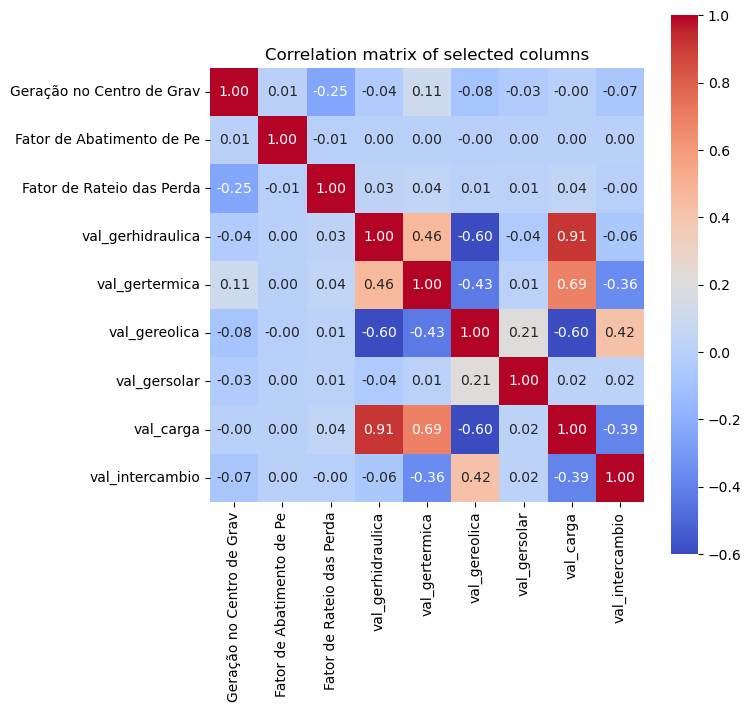

In [30]:
# Subset the dataframe to include only the columns of interest
df_subset = df_final[['Geração no Centro de Gravidade - MW médios (Gp,j) - MWh',
                      'Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)',
                      'Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*',
                      'din_instante',
                      'id_subsistema',
                      'val_gerhidraulica',
                      'val_gertermica',
                      'val_gereolica',
                      'val_gersolar',
                      'val_carga',
                      'val_intercambio']]

# Truncate column names to the first 25 characters
df_subset.columns = [col[:25] for col in df_subset.columns]

# Calculate the correlation matrix
corr = df_subset.corr()

plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix of selected columns')
plt.show()

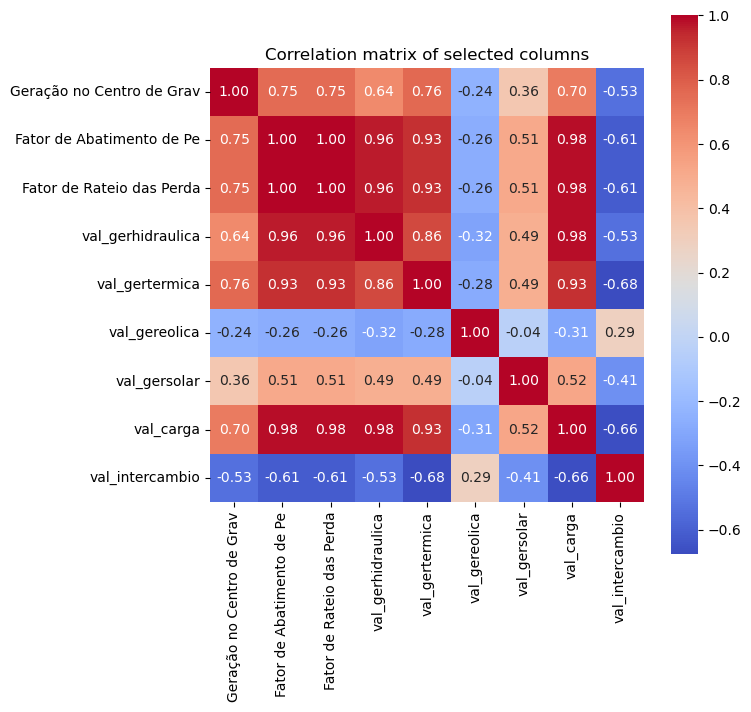

In [31]:
df_subset = df_subset.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

# Truncate column names to the first 25 characters
df_subset.columns = [col[:25] for col in df_subset.columns]

# Calculate the correlation matrix
corr = df_subset.corr()

plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix of selected columns')
plt.show()

novamente os dados agregados por subsistema mostram uma correlação muito forte comparada aos dados não agregados

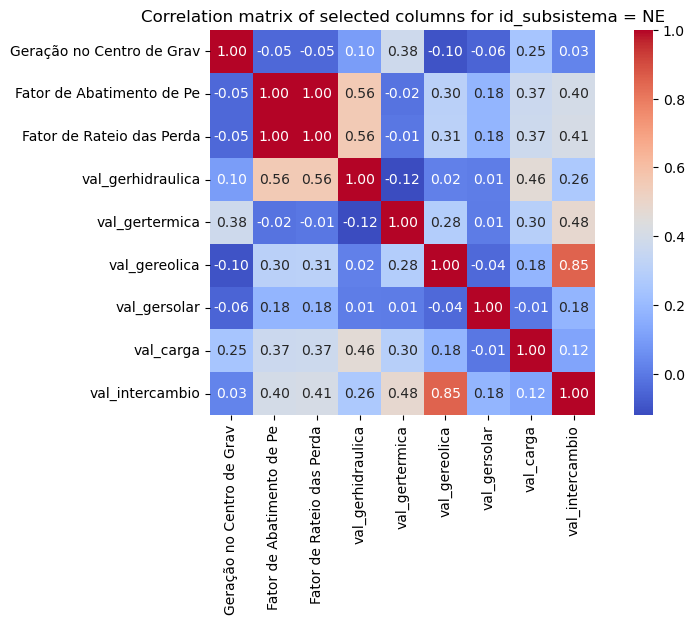

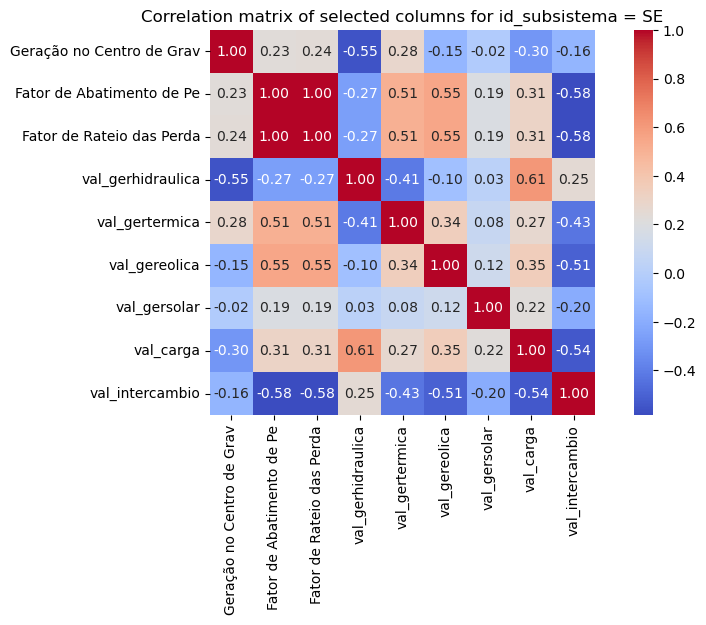

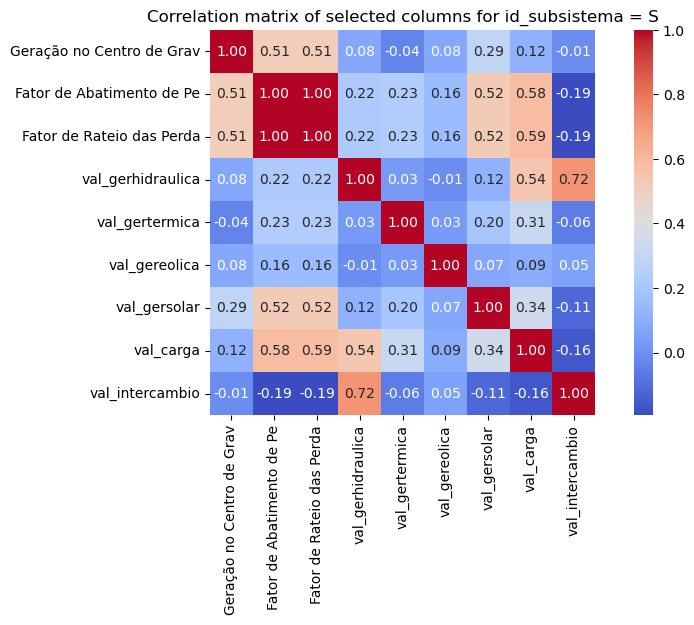

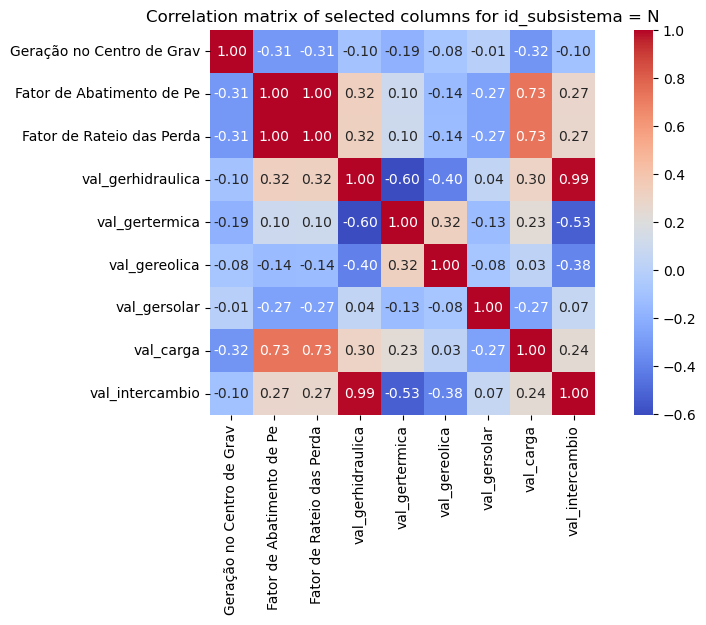

In [32]:
# Get unique values of 'id_subsistema'
ids = df_final['id_subsistema'].unique()

# Loop over unique ids
for id in ids:
    # Subset dataframe for current id
    df_subset = df_final[df_final['id_subsistema'] == id][
                             ['Geração no Centro de Gravidade - MW médios (Gp,j) - MWh',
                              'Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)',
                              'Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*',
                              'din_instante',
                              'id_subsistema',
                              'val_gerhidraulica',
                              'val_gertermica',
                              'val_gereolica',
                              'val_gersolar',
                              'val_carga',
                              'val_intercambio']
                             ]
    
    df_subset = df_subset.groupby(['din_instante']).sum().reset_index()
    
    # Truncate column names to the first 25 characters
    df_subset.columns = [col[:25] for col in df_subset.columns]

    # Calculate the correlation matrix
    corr = df_subset.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(10,5))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title(f'Correlation matrix of selected columns for id_subsistema = {id}')
    plt.show()

nada concluído, porém os comportamentos dos subsistemas é diferente.

### Terceiro Merge - cmo-semi-horario

- balanco-programacao-diaria só possui dados de 2023, logo não da para fazer merge com os dados da ccee.
- capacidade-geracao são dados sobre a capacidade de geração das usinas, dados mais atualizados são de 2011, não farei o merge por enquanto.
- pacidade-transformacao possui uma situação parecida com capacidade de geração.
- carga energia possui dados somente de 2020 pra frente, o merge entre esses dados e da ccee seriam pobres.
- carga mensal possui uma situação semelhante.
- cmo semanal pode ser feito através do cmo semi horário, vou deixar o merge deles para ser discutido no futuro.

In [33]:
dados_ons = pd.read_csv(ons_merged_data_path / 'cmo-semi-horario/cmo-semi-horario.csv', 
                                            sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons

id_subsistema         din_instante  val_cmo
0                 NE  2020-01-01 00:00:00   286.87
1                  N  2020-01-01 00:00:00   286.68
2                 SE  2020-01-01 00:00:00   285.76
3                  S  2020-01-01 00:00:00   286.68
4                 NE  2020-01-01 00:30:00   286.85
...              ...                  ...      ...
238843             S  2023-06-29 23:00:00     0.00
238844            NE  2023-06-29 23:30:00     0.00
238845             N  2023-06-29 23:30:00     0.00
238846            SE  2023-06-29 23:30:00     0.00
238847             S  2023-06-29 23:30:00     0.00

[238848 rows x 3 columns]

In [34]:
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])

dados_ons['din_instante'] = dados_ons['din_instante'].dt.floor('H')

# now group by the rounded date and 'id' and perform the sum
result_df = dados_ons.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

In [35]:
df_final = pd.merge(df_ccee,
                    result_df,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

Cód. Da Parcela de Usina       Sigla da Usina               Fonte  \
0                           287.0         SERRA GRANDE  Térmica a Biomassa   
1                           287.0         SERRA GRANDE  Térmica a Biomassa   
2                           287.0         SERRA GRANDE  Térmica a Biomassa   
3                           287.0         SERRA GRANDE  Térmica a Biomassa   
4                           287.0         SERRA GRANDE  Térmica a Biomassa   
...                           ...                  ...                 ...   
6579739                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579740                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579741                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579742                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579743                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   

        Submercado  Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0         NORDESTE                                                0.0         
1         NORDESTE                                                0.0         
2         NORDESTE                                                0.0         
3         NORDESTE                                                0.0         
4         NORDESTE                                                0.0         
...            ...                                                ...         
6579739    SUDESTE                                                0.0         
6579740    SUDESTE                                                0.0         
6579741    SUDESTE                                                0.0         
6579742    SUDESTE                                                0.0         
6579743    SUDESTE                                                0.0         

         Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                      1.0                
1                                                      1.0                
2                                                      1.0                
3                                                      1.0                
4                                                      1.0                
...                                                    ...                
6579739                                                1.0                
6579740                                                1.0                
6579741                                                1.0                
6579742                                                1.0                
6579743                                                1.0                

         Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                 1.000000     
1                                                 1.000000     
2                                                 1.000000     
3                                                 1.000000     
4                                                 1.000000     
...                                                    ...     
6579739                                           0.975016     
6579740                                           0.974504     
6579741                                           0.974388     
6579742                                           0.974447     
6579743                                           0.974293     

         Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)  \
0                                                      0.0                                            
1                                                      0.0                                            
2                                                      0.0                                            
3                                        

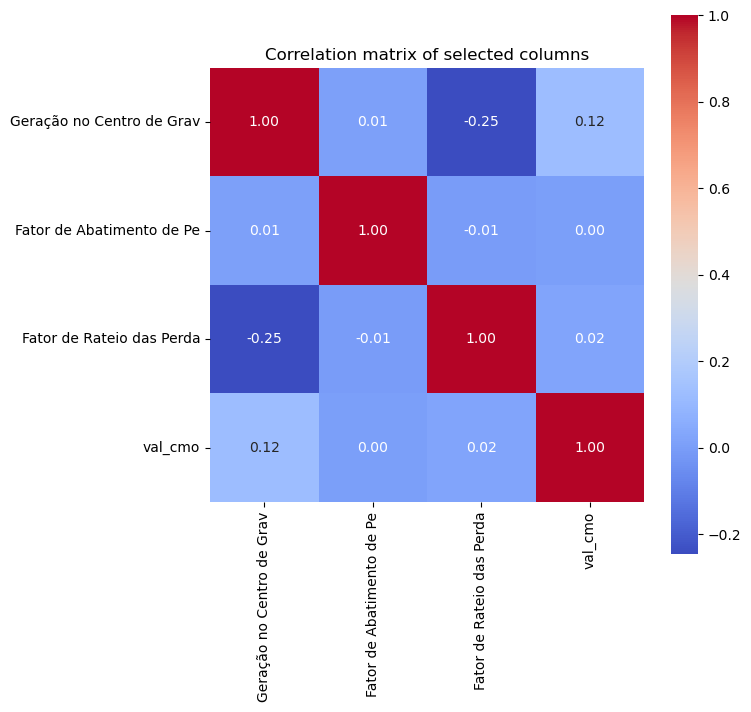

In [36]:
df_final.drop(['Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)',
               'Cód. Da Parcela de Usina'],
               axis=1,
               inplace=True)

# Truncate column names to the first 25 characters
df_final.columns = [col[:25] for col in df_final.columns]

# Calculate the correlation matrix
corr = df_final.corr()

plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix of selected columns')
plt.show()

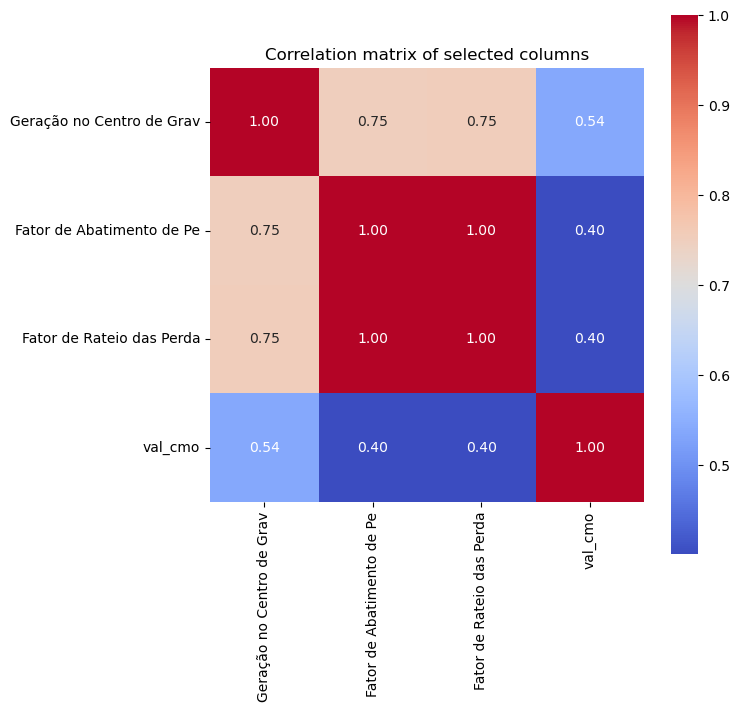

In [37]:
df_subset = df_final.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

# Truncate column names to the first 25 characters
df_subset.columns = [col[:25] for col in df_subset.columns]

# Calculate the correlation matrix
corr = df_subset.corr()

plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix of selected columns')
plt.show()

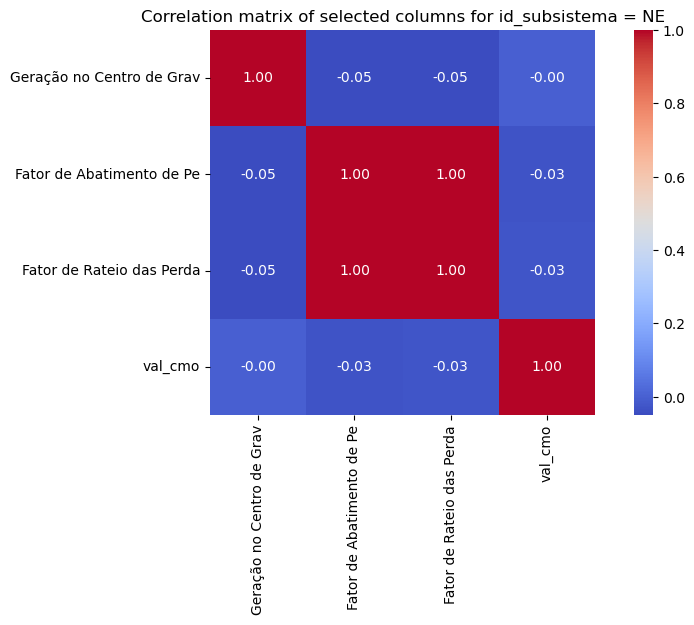

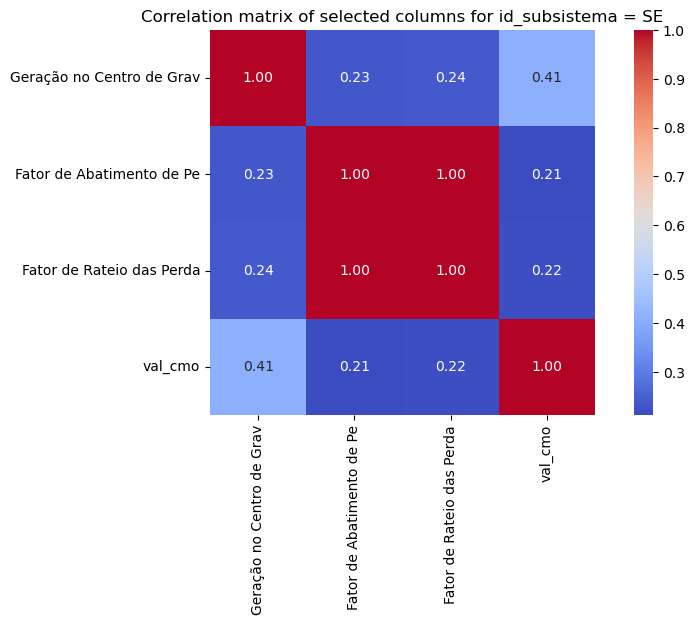

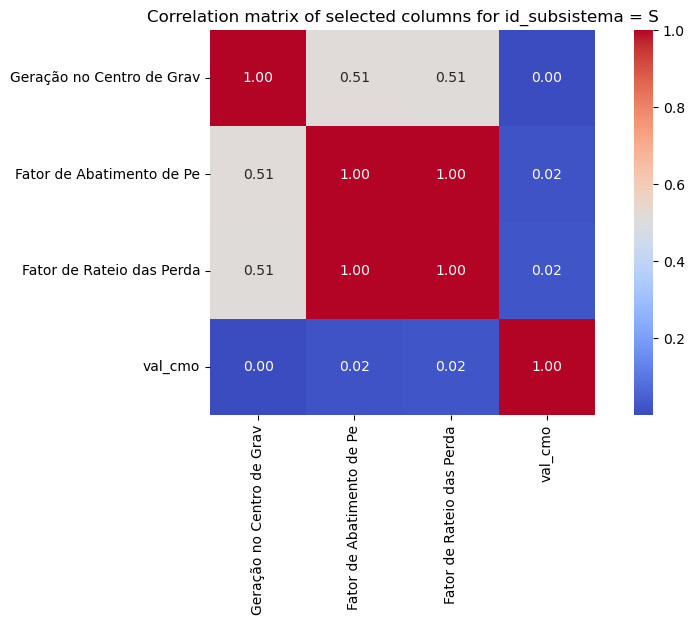

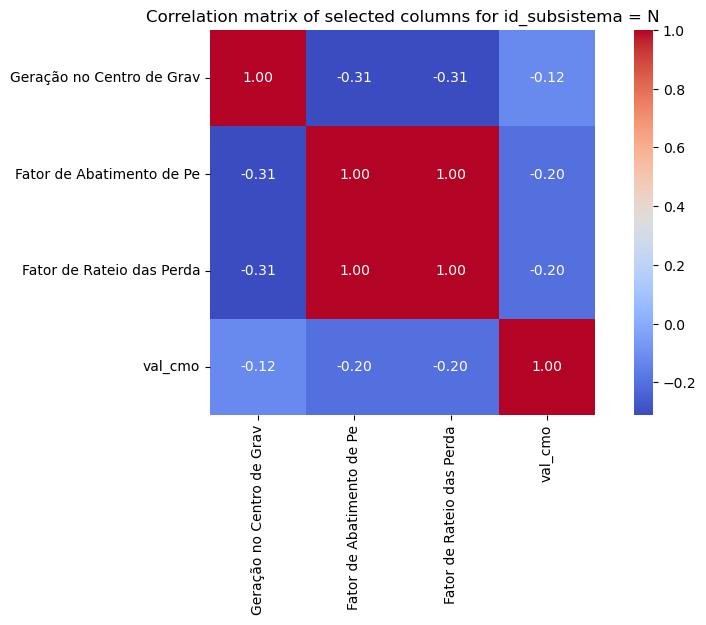

In [38]:
# Get unique values of 'id_subsistema'
ids = df_final['id_subsistema'].unique()

# Loop over unique ids
for id in ids:
    # Subset dataframe for current id
    df_subset = df_final[df_final['id_subsistema'] == id]
    
    df_subset = df_subset.groupby(['din_instante']).sum().reset_index()
    
    # Truncate column names to the first 25 characters
    df_subset.columns = [col[:25] for col in df_subset.columns]

    # Calculate the correlation matrix
    corr = df_subset.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(10,5))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title(f'Correlation matrix of selected columns for id_subsistema = {id}')
    plt.show()

### Quarto Merge - curva de carga

In [39]:
dados_ons = pd.read_csv(ons_merged_data_path / 'curva-carga/curva-carga.csv', 
                                            sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])
dados_ons

id_subsistema        din_instante  val_cargaenergiahomwmed
0                  N 2000-01-01 00:00:00                 2373.700
1                 NE 2000-01-01 00:00:00                 5340.200
2                  S 2000-01-01 00:00:00                 5777.000
3                 SE 2000-01-01 00:00:00                21183.000
4                  N 2000-01-01 01:00:00                 2331.600
...              ...                 ...                      ...
823259            SE 2023-06-27 22:00:00                41513.446
823260             N 2023-06-27 23:00:00                 7674.563
823261            NE 2023-06-27 23:00:00                11921.754
823262             S 2023-06-27 23:00:00                10842.681
823263            SE 2023-06-27 23:00:00                38079.549

[823264 rows x 3 columns]

In [40]:
df_final = pd.merge(df_ccee,
                    dados_ons,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

Cód. Da Parcela de Usina       Sigla da Usina               Fonte  \
0                           287.0         SERRA GRANDE  Térmica a Biomassa   
1                           287.0         SERRA GRANDE  Térmica a Biomassa   
2                           287.0         SERRA GRANDE  Térmica a Biomassa   
3                           287.0         SERRA GRANDE  Térmica a Biomassa   
4                           287.0         SERRA GRANDE  Térmica a Biomassa   
...                           ...                  ...                 ...   
6579739                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579740                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579741                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579742                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579743                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   

        Submercado  Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0         NORDESTE                                                0.0         
1         NORDESTE                                                0.0         
2         NORDESTE                                                0.0         
3         NORDESTE                                                0.0         
4         NORDESTE                                                0.0         
...            ...                                                ...         
6579739    SUDESTE                                                0.0         
6579740    SUDESTE                                                0.0         
6579741    SUDESTE                                                0.0         
6579742    SUDESTE                                                0.0         
6579743    SUDESTE                                                0.0         

         Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                      1.0                
1                                                      1.0                
2                                                      1.0                
3                                                      1.0                
4                                                      1.0                
...                                                    ...                
6579739                                                1.0                
6579740                                                1.0                
6579741                                                1.0                
6579742                                                1.0                
6579743                                                1.0                

         Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                 1.000000     
1                                                 1.000000     
2                                                 1.000000     
3                                                 1.000000     
4                                                 1.000000     
...                                                    ...     
6579739                                           0.975016     
6579740                                           0.974504     
6579741                                           0.974388     
6579742                                           0.974447     
6579743                                           0.974293     

         Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)  \
0                                                      0.0                                            
1                                                      0.0                                            
2                                                      0.0                                            
3                                        

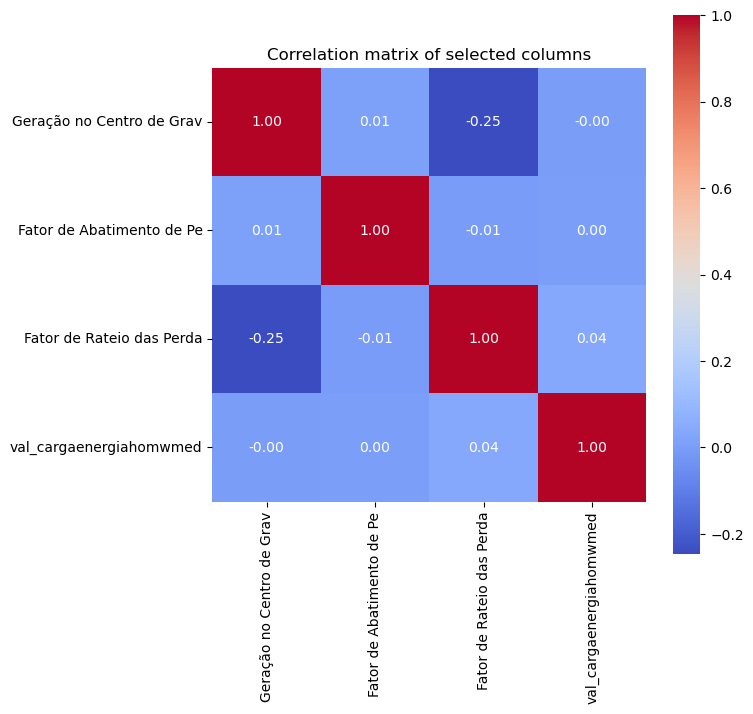

In [41]:
df_final.drop(['Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)',
               'Cód. Da Parcela de Usina'],
               axis=1,
               inplace=True)

# Truncate column names to the first 25 characters
df_final.columns = [col[:25] for col in df_final.columns]

# Calculate the correlation matrix
corr = df_final.corr()

plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix of selected columns')
plt.show()

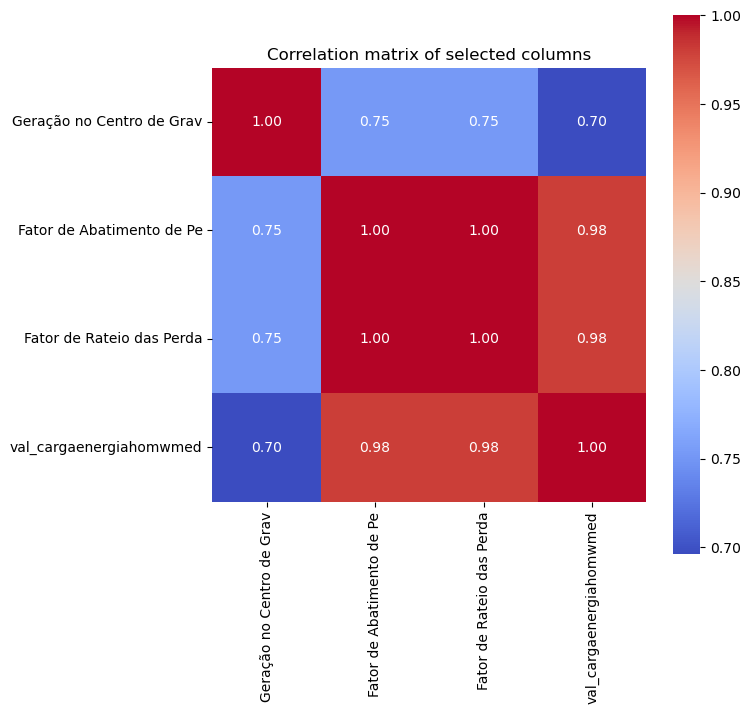

In [42]:
df_subset = df_final.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

# Truncate column names to the first 25 characters
df_subset.columns = [col[:25] for col in df_subset.columns]

# Calculate the correlation matrix
corr = df_subset.corr()

plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix of selected columns')
plt.show()

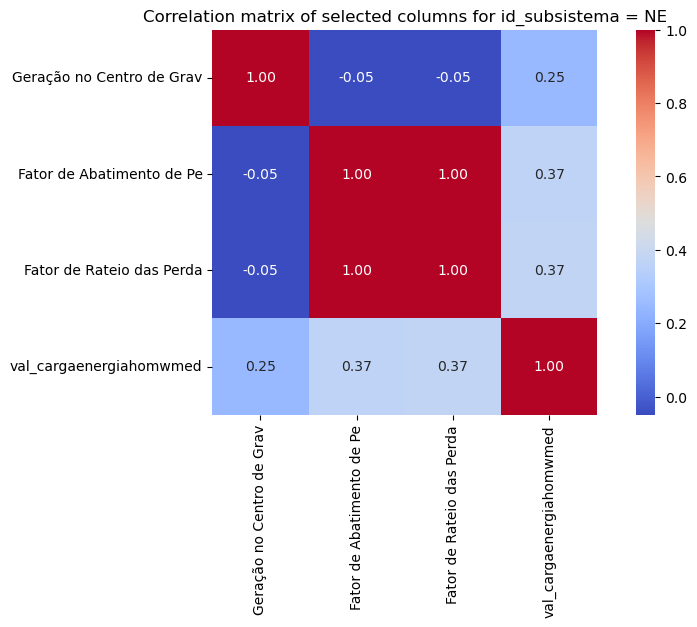

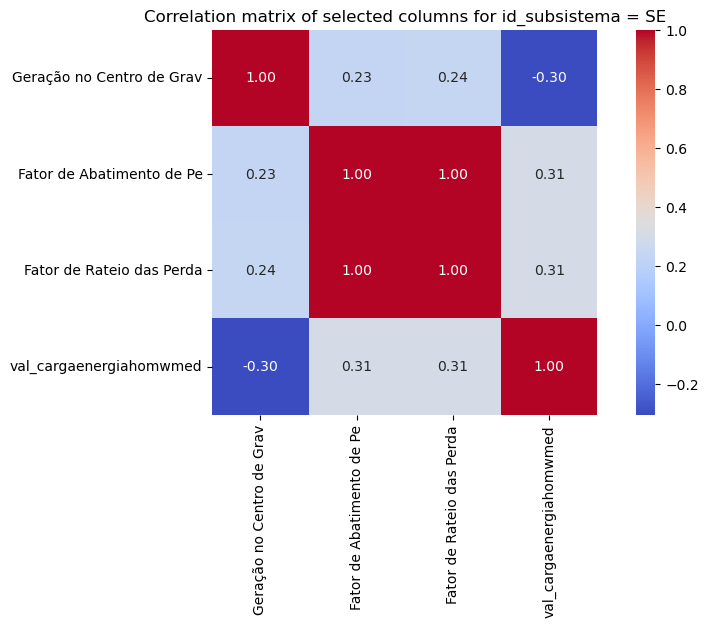

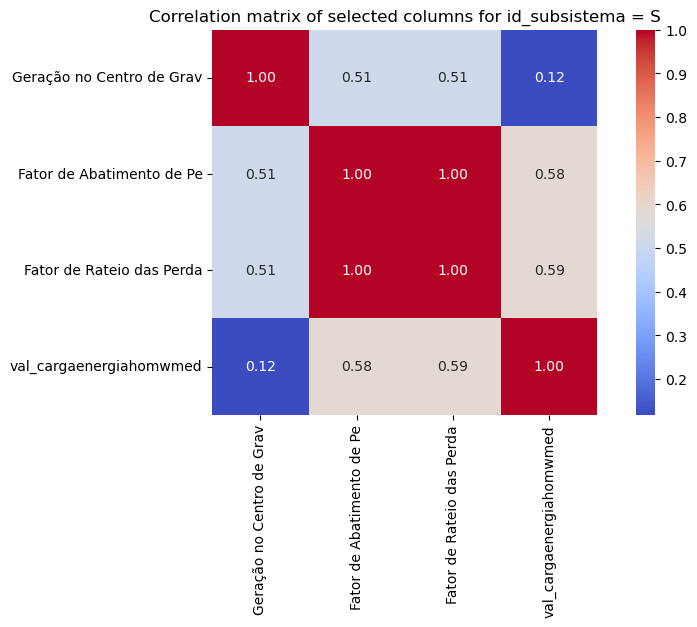

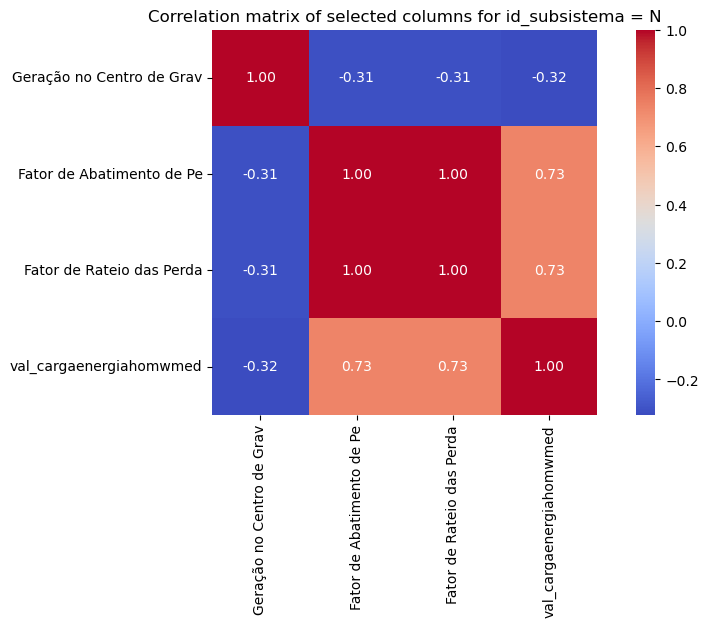

In [43]:
# Get unique values of 'id_subsistema'
ids = df_final['id_subsistema'].unique()

# Loop over unique ids
for id in ids:
    # Subset dataframe for current id
    df_subset = df_final[df_final['id_subsistema'] == id]
    
    df_subset = df_subset.groupby(['din_instante']).sum().reset_index()
    
    # Truncate column names to the first 25 characters
    df_subset.columns = [col[:25] for col in df_subset.columns]

    # Calculate the correlation matrix
    corr = df_subset.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(10,5))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title(f'Correlation matrix of selected columns for id_subsistema = {id}')
    plt.show()

### Quinto Merge - dados-hidrologicos-res

- cvu-usitermica contém dados de 2020 para frente, seriam perdidos 2 anos ao fazer o merge

In [44]:
dados_ons = pd.read_csv(ons_merged_data_path / 'dados-hidrologicos-res/dados-hidrologicos-res.csv', 
                                            sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])
dados_ons

id_subsistema         tip_reservatorio      nom_bacia nom_ree  \
0                  NE                Fio dagua  JEQUITINHONHA     NaN   
1                  NE  ReservatÃ³rio com Usina      PARAGUACU     NaN   
2                  NE  ReservatÃ³rio com Usina       PARNAIBA     NaN   
3                  NE  ReservatÃ³rio com Usina  SAO FRANCISCO     NaN   
4                  NE  ReservatÃ³rio com Usina  SAO FRANCISCO     NaN   
...               ...                      ...            ...     ...   
1353276             S                Fio dagua        URUGUAI     SUL   
1353277             S                Fio dagua        URUGUAI     SUL   
1353278             S  ReservatÃ³rio com Usina        URUGUAI     SUL   
1353279             S                Fio dagua        URUGUAI     SUL   
1353280             S                Fio dagua        URUGUAI     SUL   

        nom_reservatorio  num_ordemcs  cod_usina din_instante  \
0                ITAPEBI           67      154.0   2000-01-01   
1        PEDRA DO CAVALO          104      189.0   2000-01-01   
2         BOA ESPERANÃA          105      190.0   2000-01-01   
3             SOBRADINHO          175      169.0   2000-01-01   
4              ITAPARICA          176      172.0   2000-01-01   
...                  ...          ...        ...          ...   
1353276       MONJOLINHO          167       94.0   2023-06-28   
1353277      FOZ CHAPECO          168      103.0   2023-06-28   
1353278    QUEBRA QUEIXO          169       95.0   2023-06-28   
1353279         SAO JOSE          170      101.0   2023-06-28   
1353280   PASSO SAO JOAO          171      102.0   2023-06-28   

         val_nivelmontante  val_niveljusante  ...  val_vazaoturbinada  \
0                      NaN               NaN  ...                 NaN   
1               115.200000               NaN  ...                 NaN   
2               301.590000        259.570000  ...               417.0   
3               384.420000               NaN  ...                 NaN   
4               301.130000               NaN  ...                 NaN   
...                    ...               ...  ...                 ...   
1353276         326.529999        265.049988  ...                93.0   
1353277         264.959991        212.850006  ...              1068.0   
1353278         548.919983        426.630005  ...                76.0   
1353279         154.399994        131.250000  ...               154.0   
1353280         127.839996         98.000000  ...               153.0   

         val_vazaovertida  val_vazaooutrasestruturas  val_vazaodefluente  \
0                     NaN                        NaN                 NaN   
1                     NaN                        NaN               508.0   
2                     0.0                        NaN               417.0   
3                     0.0                        NaN              1615.0   
4                     0.0                        NaN              1670.0   
...                   ...                        ...                 ...   
1353276               0.0                        0.0                93.0   
1353277             564.0                        0.0              1632.0   
1353278              22.0                        1.0                99.0   
1353279               0.0                        0.0               154.0   
1353280              28.0                        0.0               181.0   

         val_vazaotransferida  val_vazaonatural  val_vazaoartificial  \
0                         NaN        350.720000                  NaN   
1                         NaN        422.020000                  NaN   
2                         NaN        814.640000                  NaN   
3                         NaN       3258.000000                  NaN   
4                         NaN       3527.050000                  NaN   
...                       ...               ...                  ...   
1353276                   0.0        156.184006         

In [45]:
dados_ons.drop(['tip_reservatorio',
            'nom_bacia',
            'nom_ree',
            'nom_reservatorio',
            'cod_usina'], axis=1, inplace=True)

In [46]:
result_df = dados_ons.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

df_final = pd.merge(df_ccee,
                    result_df,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

Cód. Da Parcela de Usina       Sigla da Usina               Fonte  \
0                           287.0         SERRA GRANDE  Térmica a Biomassa   
1                           287.0         SERRA GRANDE  Térmica a Biomassa   
2                           287.0         SERRA GRANDE  Térmica a Biomassa   
3                           287.0         SERRA GRANDE  Térmica a Biomassa   
4                           287.0         SERRA GRANDE  Térmica a Biomassa   
...                           ...                  ...                 ...   
6579739                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579740                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579741                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579742                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579743                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   

        Submercado  Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0         NORDESTE                                                0.0         
1         NORDESTE                                                0.0         
2         NORDESTE                                                0.0         
3         NORDESTE                                                0.0         
4         NORDESTE                                                0.0         
...            ...                                                ...         
6579739    SUDESTE                                                0.0         
6579740    SUDESTE                                                0.0         
6579741    SUDESTE                                                0.0         
6579742    SUDESTE                                                0.0         
6579743    SUDESTE                                                0.0         

         Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                      1.0                
1                                                      1.0                
2                                                      1.0                
3                                                      1.0                
4                                                      1.0                
...                                                    ...                
6579739                                                1.0                
6579740                                                1.0                
6579741                                                1.0                
6579742                                                1.0                
6579743                                                1.0                

         Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                 1.000000     
1                                                 1.000000     
2                                                 1.000000     
3                                                 1.000000     
4                                                 1.000000     
...                                                    ...     
6579739                                           0.975016     
6579740                                           0.974504     
6579741                                           0.974388     
6579742                                           0.974447     
6579743                                           0.974293     

         Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)  \
0                                                      0.0                                            
1                                                      0.0                                            
2                                                      0.0                                            
3                                        

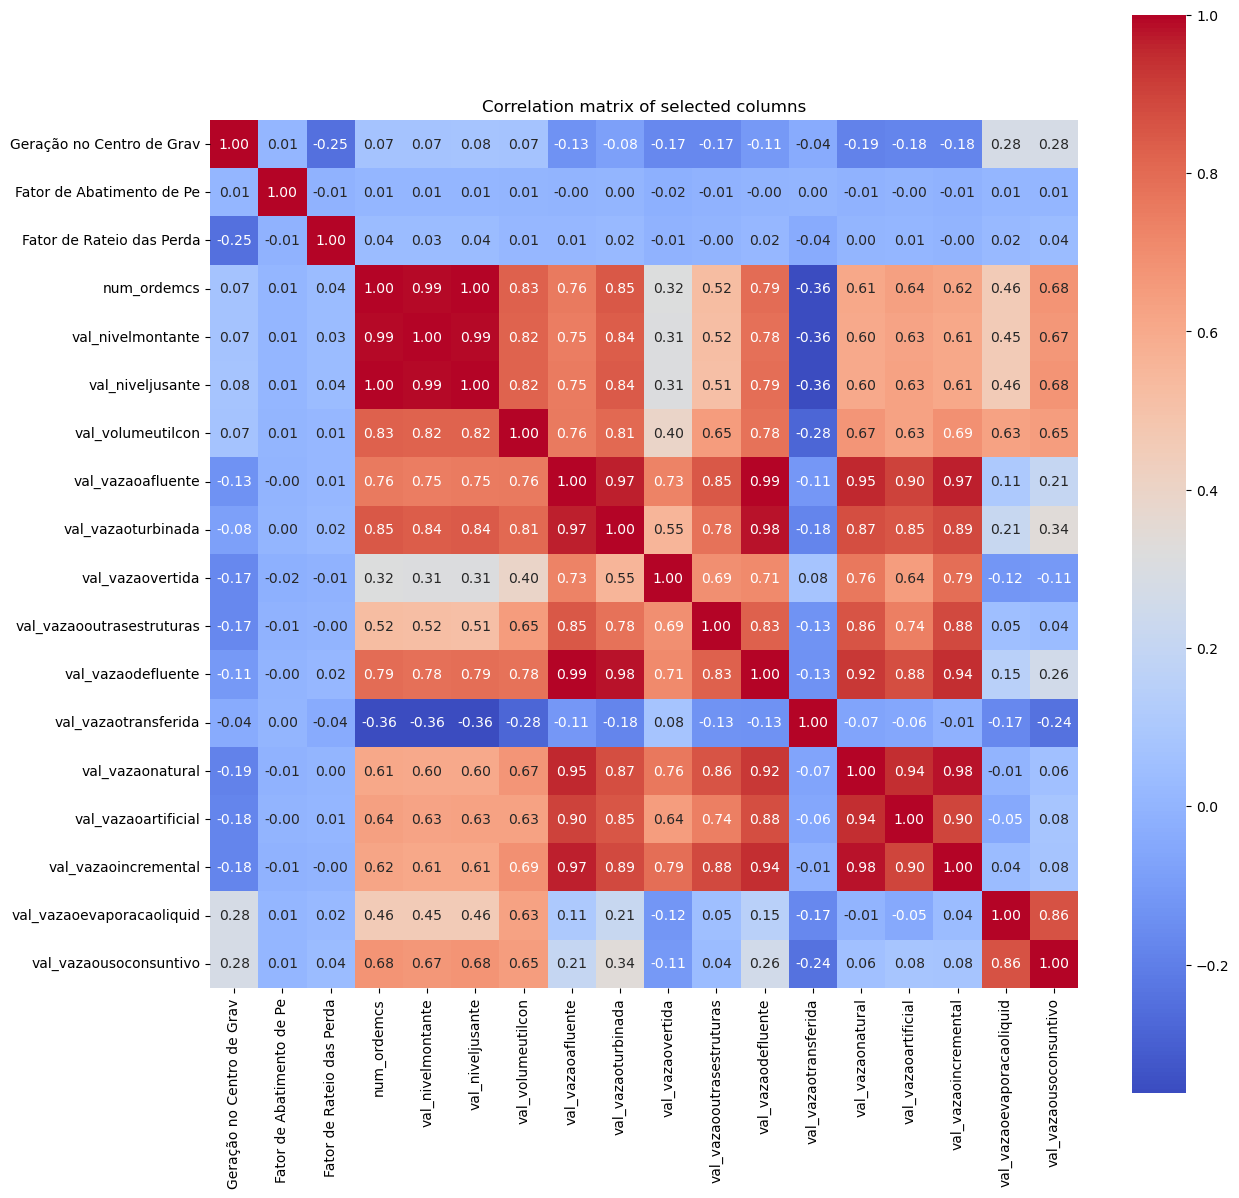

In [47]:
df_final.drop(['Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)',
               'Cód. Da Parcela de Usina'],
               axis=1,
               inplace=True)

# Truncate column names to the first 25 characters
df_final.columns = [col[:25] for col in df_final.columns]

# Calculate the correlation matrix
corr = df_final.corr()

plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix of selected columns')
plt.show()

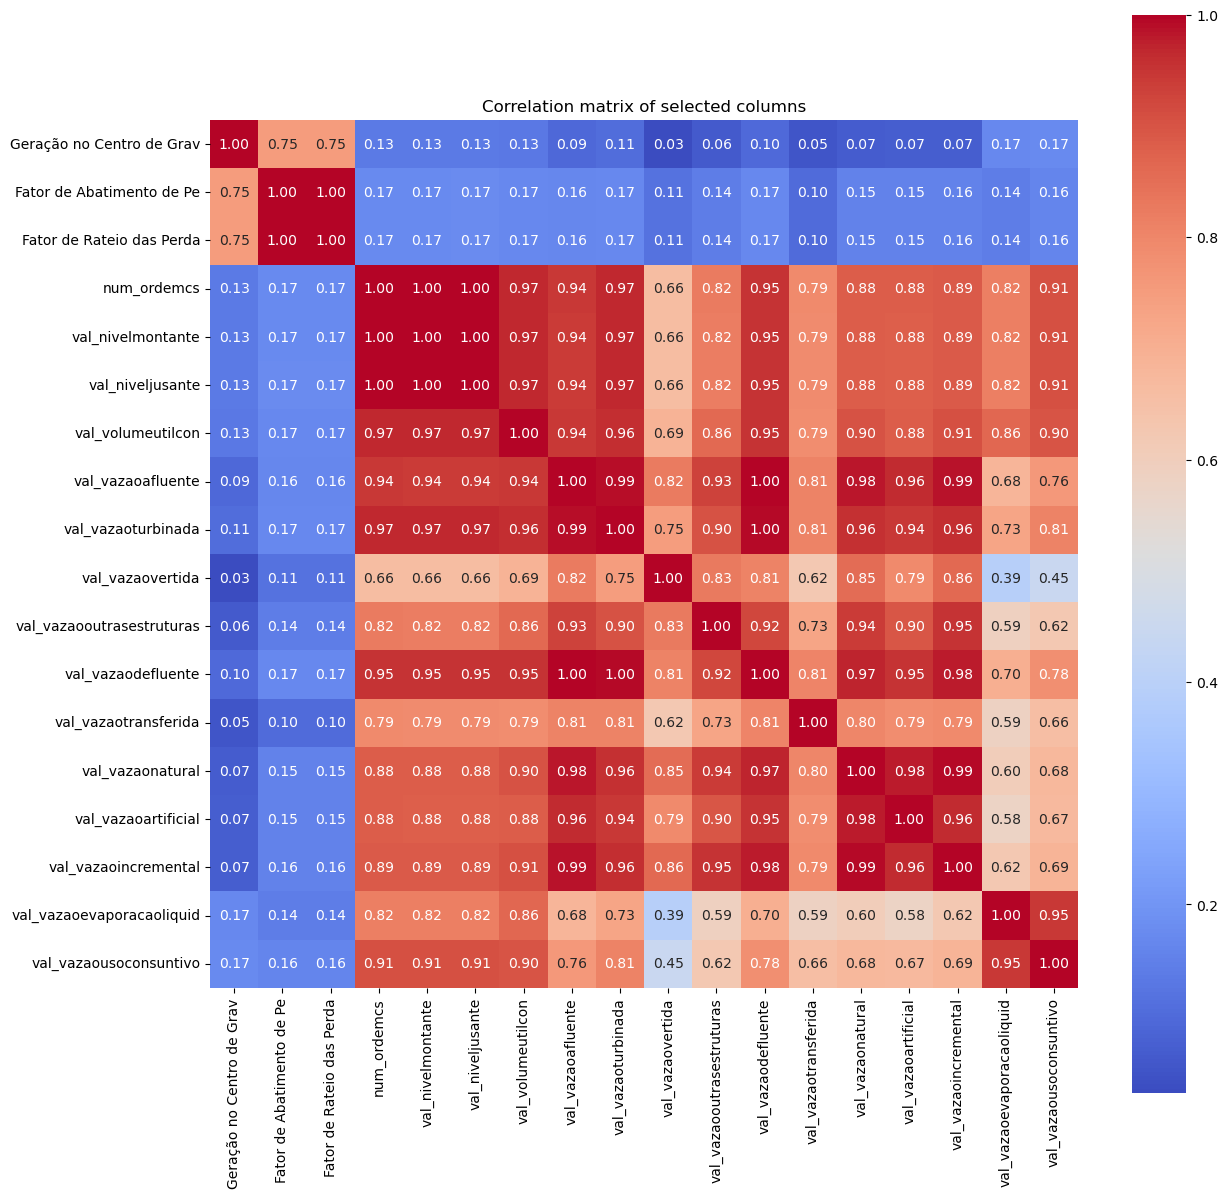

In [48]:
df_subset = df_final.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

# Truncate column names to the first 25 characters
df_subset.columns = [col[:25] for col in df_subset.columns]

# Calculate the correlation matrix
corr = df_subset.corr()

plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix of selected columns')
plt.show()

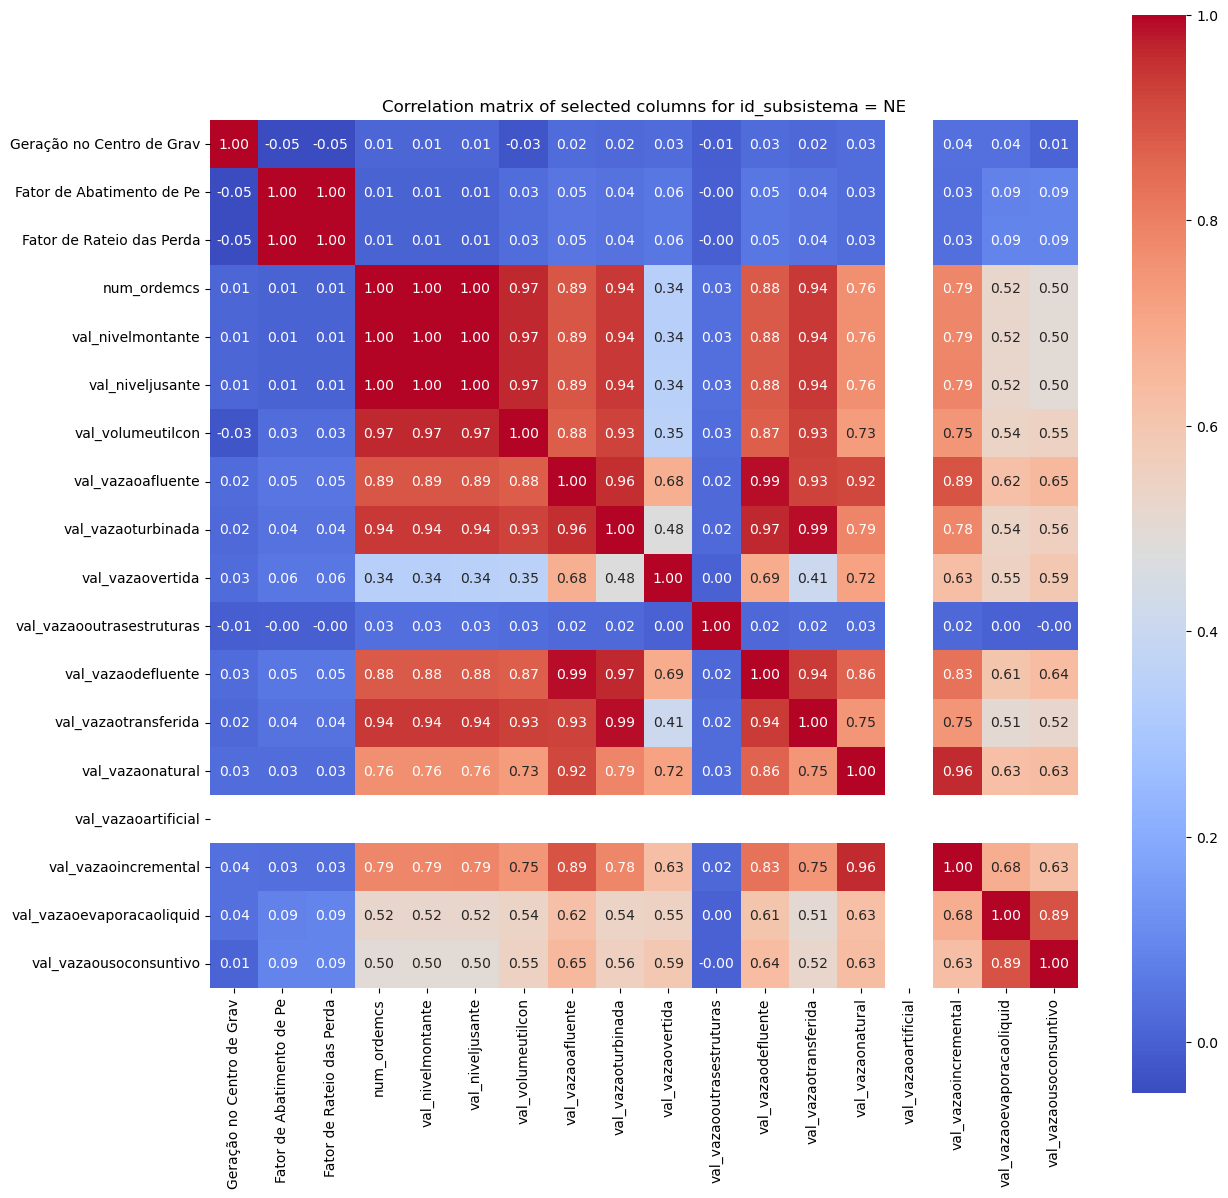

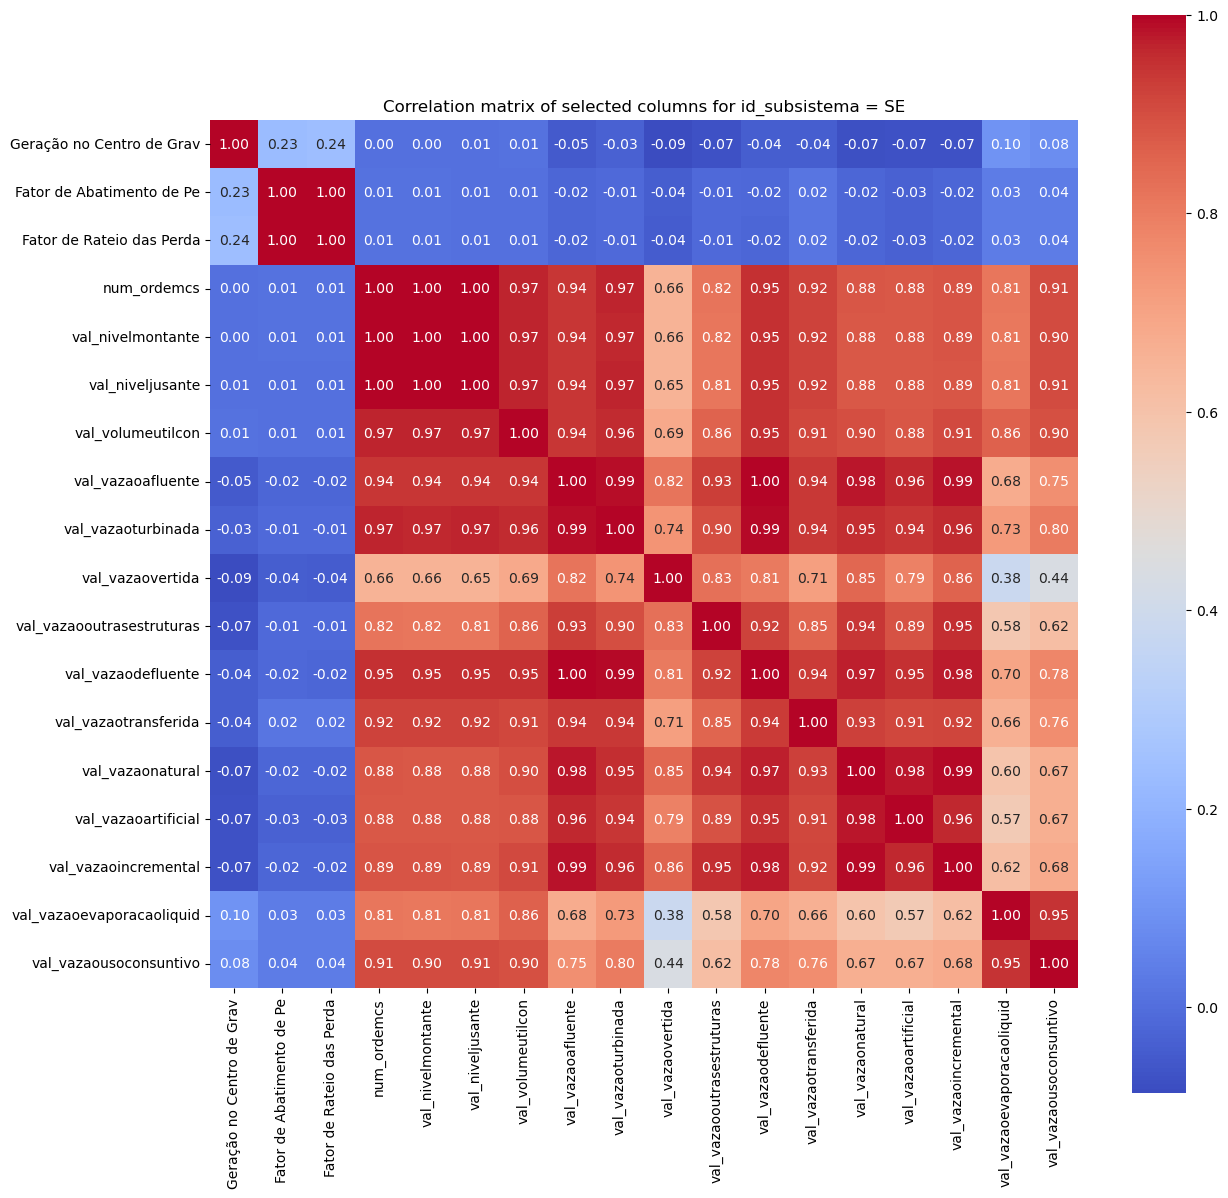

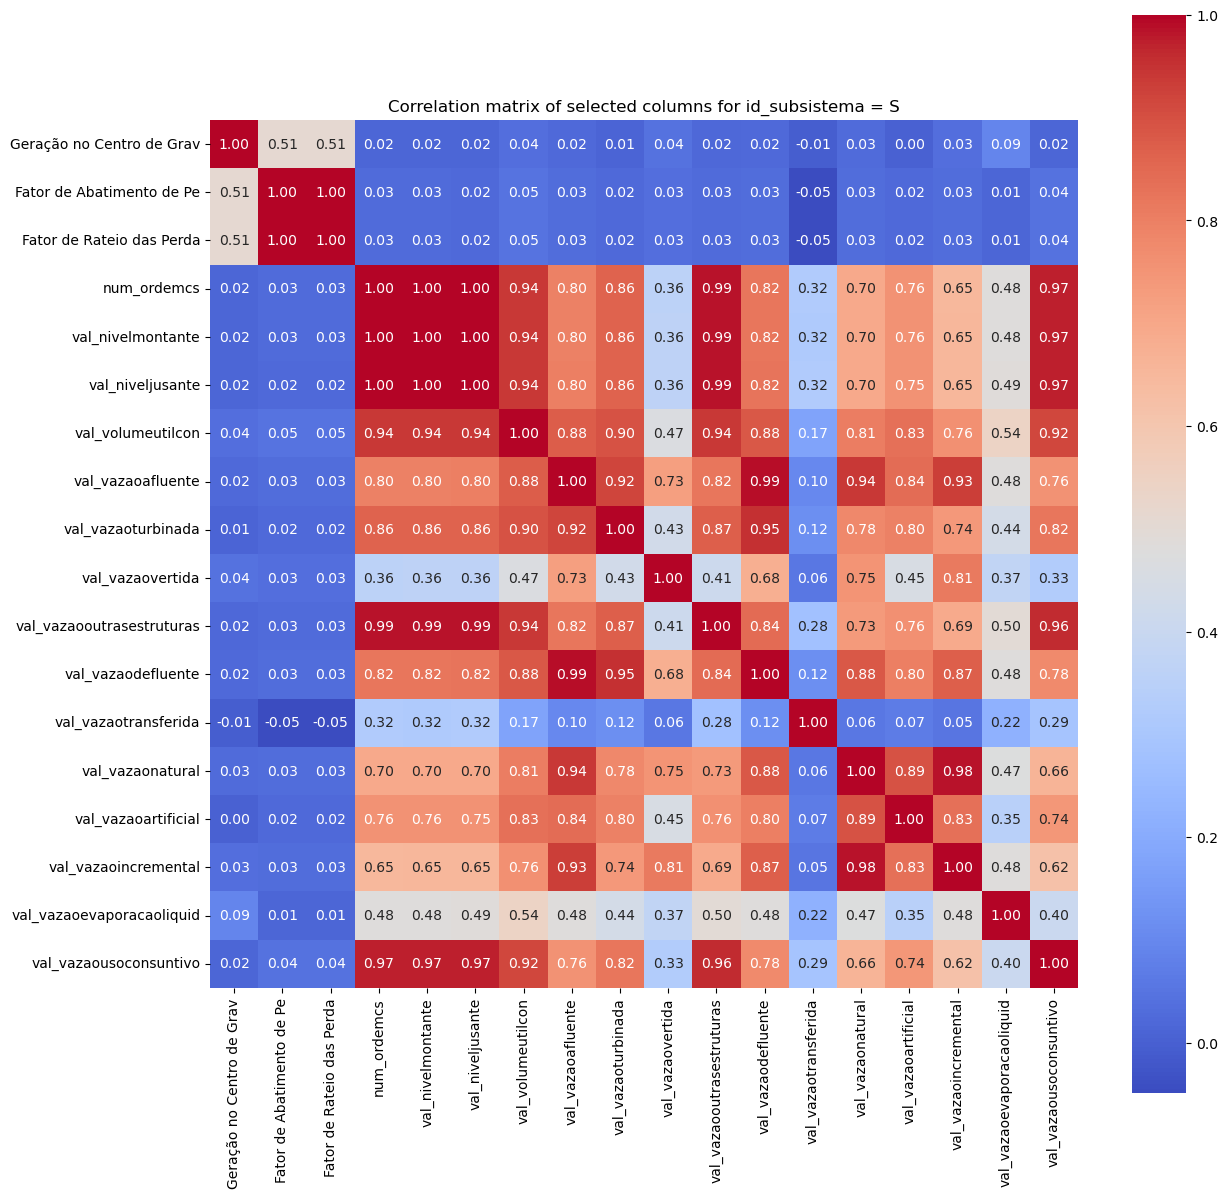

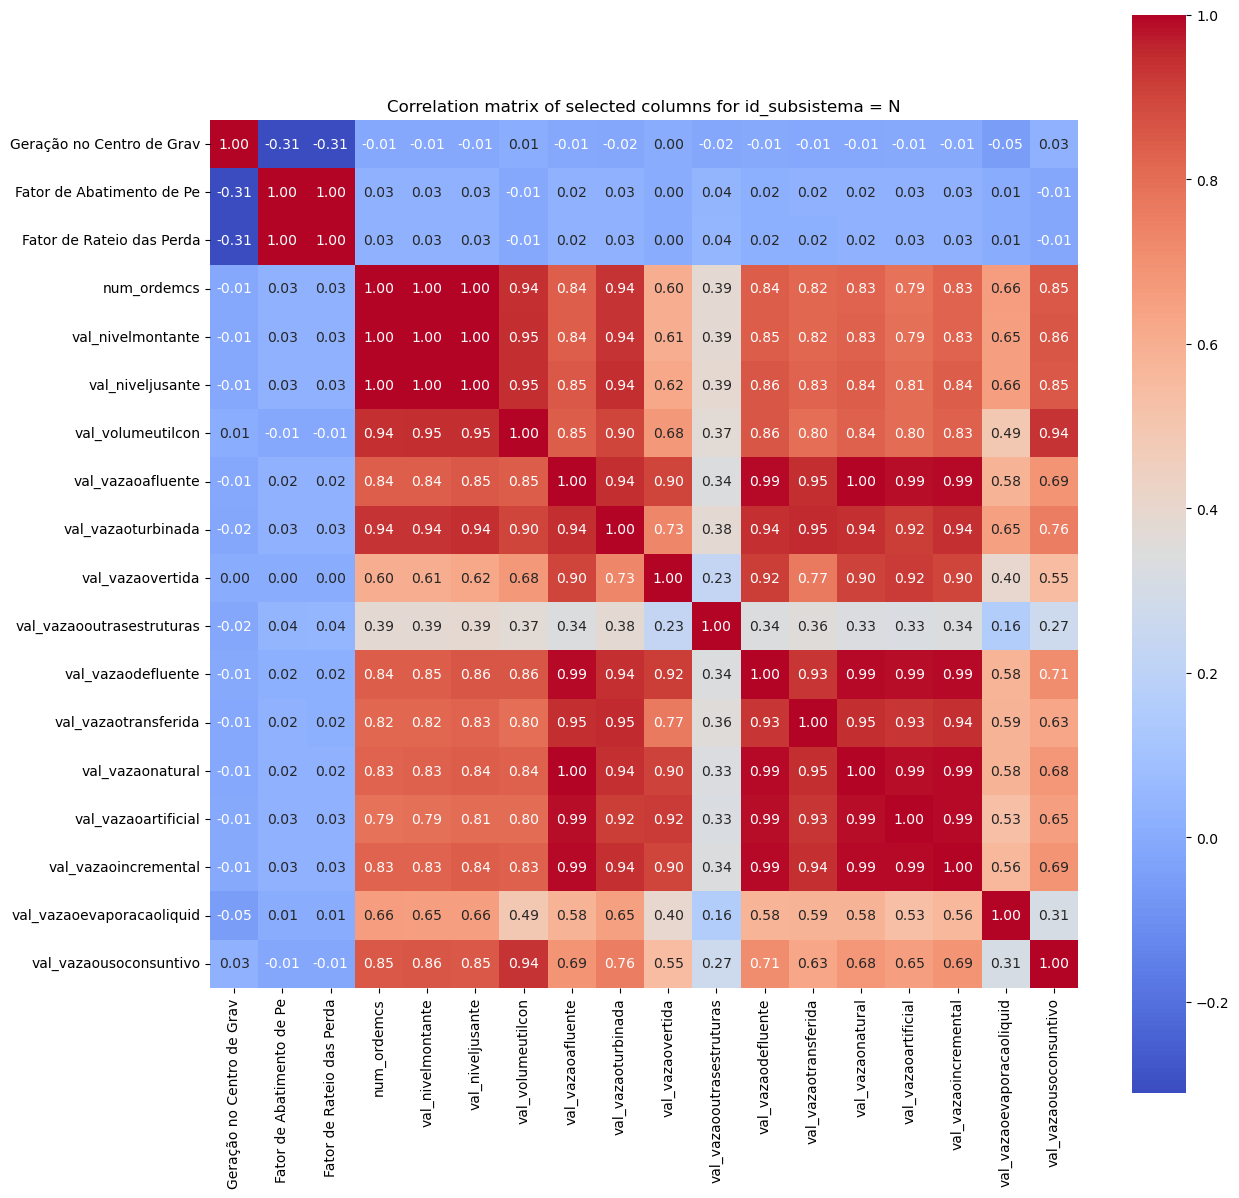

In [49]:
# Get unique values of 'id_subsistema'
ids = df_final['id_subsistema'].unique()

# Loop over unique ids
for id in ids:
    # Subset dataframe for current id
    df_subset = df_final[df_final['id_subsistema'] == id]
    
    df_subset = df_subset.groupby(['din_instante']).sum().reset_index()
    
    # Truncate column names to the first 25 characters
    df_subset.columns = [col[:25] for col in df_subset.columns]

    # Calculate the correlation matrix
    corr = df_subset.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(14,14))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title(f'Correlation matrix of selected columns for id_subsistema = {id}')
    plt.show()

### Sexto Merge - ear-diario-por-subsistema

como estou visando fazer o merge por subsistema vou usar o ear diario por subsistema, tirar dúvida se engloba reservatórios e bacias.

In [50]:
dados_ons = pd.read_csv(ons_merged_data_path / 'ear-diario-por-subsistema/ear-diario-por-subsistema.csv', 
                                            sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons.rename(columns={'ear_data':'din_instante'},inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])
dados_ons

df_final = pd.merge(df_ccee,
                    dados_ons,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

Cód. Da Parcela de Usina       Sigla da Usina               Fonte  \
0                           287.0         SERRA GRANDE  Térmica a Biomassa   
1                           287.0         SERRA GRANDE  Térmica a Biomassa   
2                           287.0         SERRA GRANDE  Térmica a Biomassa   
3                           287.0         SERRA GRANDE  Térmica a Biomassa   
4                           287.0         SERRA GRANDE  Térmica a Biomassa   
...                           ...                  ...                 ...   
6579739                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579740                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579741                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579742                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579743                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   

        Submercado  Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0         NORDESTE                                                0.0         
1         NORDESTE                                                0.0         
2         NORDESTE                                                0.0         
3         NORDESTE                                                0.0         
4         NORDESTE                                                0.0         
...            ...                                                ...         
6579739    SUDESTE                                                0.0         
6579740    SUDESTE                                                0.0         
6579741    SUDESTE                                                0.0         
6579742    SUDESTE                                                0.0         
6579743    SUDESTE                                                0.0         

         Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                      1.0                
1                                                      1.0                
2                                                      1.0                
3                                                      1.0                
4                                                      1.0                
...                                                    ...                
6579739                                                1.0                
6579740                                                1.0                
6579741                                                1.0                
6579742                                                1.0                
6579743                                                1.0                

         Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                 1.000000     
1                                                 1.000000     
2                                                 1.000000     
3                                                 1.000000     
4                                                 1.000000     
...                                                    ...     
6579739                                           0.975016     
6579740                                           0.974504     
6579741                                           0.974388     
6579742                                           0.974447     
6579743                                           0.974293     

         Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)  \
0                                                      0.0                                            
1                                                      0.0                                            
2                                                      0.0                                            
3                                        

### Sétimo Merge - ena-diario-por-subsistema

In [51]:
dados_ons = pd.read_csv(ons_merged_data_path / 'ena-diario-por-subsistema/ena-diario-por-subsistema.csv', 
                                            sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons.rename(columns={'ena_data':'din_instante'},inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])
dados_ons

df_final = pd.merge(df_ccee,
                    dados_ons,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

Cód. Da Parcela de Usina       Sigla da Usina               Fonte  \
0                           287.0         SERRA GRANDE  Térmica a Biomassa   
1                           287.0         SERRA GRANDE  Térmica a Biomassa   
2                           287.0         SERRA GRANDE  Térmica a Biomassa   
3                           287.0         SERRA GRANDE  Térmica a Biomassa   
4                           287.0         SERRA GRANDE  Térmica a Biomassa   
...                           ...                  ...                 ...   
6579739                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579740                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579741                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579742                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579743                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   

        Submercado  Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0         NORDESTE                                                0.0         
1         NORDESTE                                                0.0         
2         NORDESTE                                                0.0         
3         NORDESTE                                                0.0         
4         NORDESTE                                                0.0         
...            ...                                                ...         
6579739    SUDESTE                                                0.0         
6579740    SUDESTE                                                0.0         
6579741    SUDESTE                                                0.0         
6579742    SUDESTE                                                0.0         
6579743    SUDESTE                                                0.0         

         Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                      1.0                
1                                                      1.0                
2                                                      1.0                
3                                                      1.0                
4                                                      1.0                
...                                                    ...                
6579739                                                1.0                
6579740                                                1.0                
6579741                                                1.0                
6579742                                                1.0                
6579743                                                1.0                

         Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                 1.000000     
1                                                 1.000000     
2                                                 1.000000     
3                                                 1.000000     
4                                                 1.000000     
...                                                    ...     
6579739                                           0.975016     
6579740                                           0.974504     
6579741                                           0.974388     
6579742                                           0.974447     
6579743                                           0.974293     

         Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)  \
0                                                      0.0                                            
1                                                      0.0                                            
2                                                      0.0                                            
3                                        

### Oitovo Merge - energia-vertida-turbinavel

In [52]:
dados_ons = pd.read_csv(ons_merged_data_path / 'energia-vertida-turbinavel/energia-vertida-turbinavel.csv', 
                                            sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons.rename(columns={'ena_data':'din_instante'},inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])
dados_ons

dados_ons.drop(['nom_bacia',
                'nom_rio',
                'nom_agente',
                'nom_reservatorio',
                'cod_usina'], axis=1, inplace=True)

result_df = dados_ons.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

result_df

id_subsistema        din_instante  val_geracao  val_disponibilidade  \
0                  N 2015-01-01 00:00:00     3310.526             6541.310   
1                  N 2015-01-01 01:00:00     3309.811             6541.310   
2                  N 2015-01-01 02:00:00     2885.636             6541.310   
3                  N 2015-01-01 03:00:00     2406.538             6541.310   
4                  N 2015-01-01 04:00:00     2361.206             6541.310   
...              ...                 ...          ...                  ...   
296619            SE 2023-06-27 19:00:00    34506.889            52945.113   
296620            SE 2023-06-27 20:00:00    33283.029            52945.113   
296621            SE 2023-06-27 21:00:00    32836.718            52945.113   
296622            SE 2023-06-27 22:00:00    30136.818            52945.113   
296623            SE 2023-06-27 23:00:00    26304.851            52945.113   

        val_vazaoturbinada  val_vazaovertida  val_vazaovertidanaoturbinavel  \
0                   8048.0              55.0                            0.0   
1                   7068.0              55.0                            0.0   
2                   6476.0              55.0                            0.0   
3                   6023.0              55.0                            0.0   
4                   5903.0              55.0                            0.0   
...                    ...               ...                            ...   
296619             86964.0             602.0                            5.0   
296620             85479.0             615.0                            5.0   
296621             85325.0             398.0                            5.0   
296622             80277.0             386.0                            5.0   
296623             73170.0             392.0                            5.0   

        val_produtividade  val_folgadegeracao  val_energiavertida  \
0                1.239339            3230.784           10.580346   
1                1.371102            3231.499           12.347563   
2                1.382571            3655.674           12.663051   
3                1.326629            4134.772           12.366651   
4                1.337000            4180.104           12.665223   
...                   ...                 ...                 ...   
296619          59.229693           18466.932          335.560779   
296620          60.506734           19691.298          334.688162   
296621          59.215997           20135.252          220.950584   
296622          58.894179           22834.777          211.011994   
296623          57.698594           26665.466          205.878842   

        val_vazaovertidaturbinavel  val_energiavertidaturbinavel  
0                             55.0                     10.580346  
1                             55.0                     12.347563  
2                             55.0                     12.663051  
3                             55.0                     12.366651  
4                             55.0                     12.665223  
...                            ...                           ...  
296619                       546.0                    308.139188  
296620                       606.0                    330.308336  
296621                       338.0                    192.082090  
296622                       377.0                    206.628864  
296623                       384.0                    202.592277  

[296624 rows x 12 columns]

In [53]:
df_final = pd.merge(df_ccee,
                    result_df,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

Cód. Da Parcela de Usina       Sigla da Usina               Fonte  \
0                           287.0         SERRA GRANDE  Térmica a Biomassa   
1                           287.0         SERRA GRANDE  Térmica a Biomassa   
2                           287.0         SERRA GRANDE  Térmica a Biomassa   
3                           287.0         SERRA GRANDE  Térmica a Biomassa   
4                           287.0         SERRA GRANDE  Térmica a Biomassa   
...                           ...                  ...                 ...   
6579739                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579740                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579741                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579742                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579743                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   

        Submercado  Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0         NORDESTE                                                0.0         
1         NORDESTE                                                0.0         
2         NORDESTE                                                0.0         
3         NORDESTE                                                0.0         
4         NORDESTE                                                0.0         
...            ...                                                ...         
6579739    SUDESTE                                                0.0         
6579740    SUDESTE                                                0.0         
6579741    SUDESTE                                                0.0         
6579742    SUDESTE                                                0.0         
6579743    SUDESTE                                                0.0         

         Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                      1.0                
1                                                      1.0                
2                                                      1.0                
3                                                      1.0                
4                                                      1.0                
...                                                    ...                
6579739                                                1.0                
6579740                                                1.0                
6579741                                                1.0                
6579742                                                1.0                
6579743                                                1.0                

         Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                 1.000000     
1                                                 1.000000     
2                                                 1.000000     
3                                                 1.000000     
4                                                 1.000000     
...                                                    ...     
6579739                                           0.975016     
6579740                                           0.974504     
6579741                                           0.974388     
6579742                                           0.974447     
6579743                                           0.974293     

         Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)  \
0                                                      0.0                                            
1                                                      0.0                                            
2                                                      0.0                                            
3                                        

### Nono Merge - geracao-termica-despacho-2

- equipamento-controle-reativo - São dados de equipamentos, acredito não ser relevante para o avanço dos estudos
- fator-capacidade-2 - maioria das colunas são totalmente NA

In [54]:
dados_ons = pd.read_csv(ons_merged_data_path / 'geracao-termica-despacho-2/geracao-termica-despacho-2.csv', 
                                            sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])
dados_ons

dados_ons.drop([
    'nom_tipopatamar', 
    'nom_usina',
    'cod_usinaplanejamento'
], axis=1, inplace=True)

result_df = dados_ons.groupby(['id_subsistema', 'din_instante']).sum().reset_index()
result_df

df_final = pd.merge(df_ccee,
                    result_df,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

Cód. Da Parcela de Usina       Sigla da Usina               Fonte  \
0                           287.0         SERRA GRANDE  Térmica a Biomassa   
1                           287.0         SERRA GRANDE  Térmica a Biomassa   
2                           287.0         SERRA GRANDE  Térmica a Biomassa   
3                           287.0         SERRA GRANDE  Térmica a Biomassa   
4                           287.0         SERRA GRANDE  Térmica a Biomassa   
...                           ...                  ...                 ...   
6579739                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579740                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579741                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579742                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579743                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   

        Submercado  Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0         NORDESTE                                                0.0         
1         NORDESTE                                                0.0         
2         NORDESTE                                                0.0         
3         NORDESTE                                                0.0         
4         NORDESTE                                                0.0         
...            ...                                                ...         
6579739    SUDESTE                                                0.0         
6579740    SUDESTE                                                0.0         
6579741    SUDESTE                                                0.0         
6579742    SUDESTE                                                0.0         
6579743    SUDESTE                                                0.0         

         Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                      1.0                
1                                                      1.0                
2                                                      1.0                
3                                                      1.0                
4                                                      1.0                
...                                                    ...                
6579739                                                1.0                
6579740                                                1.0                
6579741                                                1.0                
6579742                                                1.0                
6579743                                                1.0                

         Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                 1.000000     
1                                                 1.000000     
2                                                 1.000000     
3                                                 1.000000     
4                                                 1.000000     
...                                                    ...     
6579739                                           0.975016     
6579740                                           0.974504     
6579741                                           0.974388     
6579742                                           0.974447     
6579743                                           0.974293     

         Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)  \
0                                                      0.0                                            
1                                                      0.0                                            
2                                                      0.0                                            
3                                        

### Décimo Merge - importacaoenergia-comercial-2

- grandezas_fluviometricas não possui dados temporais para merge

In [55]:
dados_ons = pd.read_csv(ons_merged_data_path / 'importacaoenergia-comercial-2/importacaoenergia-comercial-2.csv', 
                                            sep=';')
dados_ons.rename(columns={'val_preco':'val_preco_importacao'}, inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])

dados_ons.drop(['nom_pais',
                'nom_agente',
                'nom_bloco'], axis=1, inplace=True)

In [56]:
result_df = dados_ons.groupby(['din_instante']).sum().reset_index()
result_df

din_instante  val_importacaoprogramada  val_importacaodespachada  \
0     2019-01-01 00:00:00                       0.0                       0.0   
1     2019-01-01 01:00:00                       0.0                       0.0   
2     2019-01-01 02:00:00                       0.0                       0.0   
3     2019-01-01 03:00:00                       0.0                       0.0   
4     2019-01-01 04:00:00                       0.0                       0.0   
...                   ...                       ...                       ...   
39331 2023-06-27 19:00:00                       0.0                       0.0   
39332 2023-06-27 20:00:00                       0.0                       0.0   
39333 2023-06-27 21:00:00                       0.0                       0.0   
39334 2023-06-27 22:00:00                       0.0                       0.0   
39335 2023-06-27 23:00:00                       0.0                       0.0   

       val_importacaoverificada  val_preco_importacao  
0                           0.0                 69.52  
1                           0.0                 69.52  
2                           0.0                 69.52  
3                           0.0                 69.52  
4                           0.0                 69.52  
...                         ...                   ...  
39331                       0.0                  0.00  
39332                       0.0                  0.00  
39333                       0.0                  0.00  
39334                       0.0                  0.00  
39335                       0.0                  0.00  

[39336 rows x 5 columns]

In [57]:
df_final = pd.merge(df_ccee,
                    result_df,
                    on=['din_instante'],
                    how='left')
df_final

Cód. Da Parcela de Usina       Sigla da Usina               Fonte  \
0                           287.0         SERRA GRANDE  Térmica a Biomassa   
1                           287.0         SERRA GRANDE  Térmica a Biomassa   
2                           287.0         SERRA GRANDE  Térmica a Biomassa   
3                           287.0         SERRA GRANDE  Térmica a Biomassa   
4                           287.0         SERRA GRANDE  Térmica a Biomassa   
...                           ...                  ...                 ...   
6579739                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579740                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579741                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579742                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579743                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   

        Submercado  Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0         NORDESTE                                                0.0         
1         NORDESTE                                                0.0         
2         NORDESTE                                                0.0         
3         NORDESTE                                                0.0         
4         NORDESTE                                                0.0         
...            ...                                                ...         
6579739    SUDESTE                                                0.0         
6579740    SUDESTE                                                0.0         
6579741    SUDESTE                                                0.0         
6579742    SUDESTE                                                0.0         
6579743    SUDESTE                                                0.0         

         Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                      1.0                
1                                                      1.0                
2                                                      1.0                
3                                                      1.0                
4                                                      1.0                
...                                                    ...                
6579739                                                1.0                
6579740                                                1.0                
6579741                                                1.0                
6579742                                                1.0                
6579743                                                1.0                

         Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                 1.000000     
1                                                 1.000000     
2                                                 1.000000     
3                                                 1.000000     
4                                                 1.000000     
...                                                    ...     
6579739                                           0.975016     
6579740                                           0.974504     
6579741                                           0.974388     
6579742                                           0.974447     
6579743                                           0.974293     

         Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)  \
0                                                      0.0                                            
1                                                      0.0                                            
2                                                      0.0                                            
3                                        

### Décimo Primeiro Merge - ind-disponibilidade-geracao

- ind_disponibilidade_ft_conversor - dados a partir de 2020 serão perdidos 2 anos para fazer o merge
- ind_disponibilidade_ft_trlt - os dados contemplam um range de data maior, mas não entendo a relevancia para agregação

In [58]:
dados_ons = pd.read_csv(ons_merged_data_path / 'ind-disponibilidade-geracao/ind-disponibilidade-geracao.csv', 
                                            sep=';')
dados_ons.rename(columns={'dat_referencia':'din_instante'}, inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])
dados_ons

df_final = pd.merge(df_ccee,
                    dados_ons,
                    on=['din_instante'],
                    how='left')
df_final

Cód. Da Parcela de Usina       Sigla da Usina               Fonte  \
0                           287.0         SERRA GRANDE  Térmica a Biomassa   
1                           287.0         SERRA GRANDE  Térmica a Biomassa   
2                           287.0         SERRA GRANDE  Térmica a Biomassa   
3                           287.0         SERRA GRANDE  Térmica a Biomassa   
4                           287.0         SERRA GRANDE  Térmica a Biomassa   
...                           ...                  ...                 ...   
6579739                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579740                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579741                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579742                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579743                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   

        Submercado  Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0         NORDESTE                                                0.0         
1         NORDESTE                                                0.0         
2         NORDESTE                                                0.0         
3         NORDESTE                                                0.0         
4         NORDESTE                                                0.0         
...            ...                                                ...         
6579739    SUDESTE                                                0.0         
6579740    SUDESTE                                                0.0         
6579741    SUDESTE                                                0.0         
6579742    SUDESTE                                                0.0         
6579743    SUDESTE                                                0.0         

         Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                      1.0                
1                                                      1.0                
2                                                      1.0                
3                                                      1.0                
4                                                      1.0                
...                                                    ...                
6579739                                                1.0                
6579740                                                1.0                
6579741                                                1.0                
6579742                                                1.0                
6579743                                                1.0                

         Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                 1.000000     
1                                                 1.000000     
2                                                 1.000000     
3                                                 1.000000     
4                                                 1.000000     
...                                                    ...     
6579739                                           0.975016     
6579740                                           0.974504     
6579741                                           0.974388     
6579742                                           0.974447     
6579743                                           0.974293     

         Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)  \
0                                                      0.0                                            
1                                                      0.0                                            
2                                                      0.0                                            
3                                        

### Décimo Segundo Merge - intercambio-internacional

In [59]:
dados_ons = pd.read_csv(ons_merged_data_path / 'intercambio-internacional/intercambio-internacional.csv', 
                                            sep=';')

dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])

dados_ons.drop('nom_paisdestino', axis=1, inplace=True)
result_df = dados_ons.groupby(['din_instante']).sum().reset_index()

df_final = pd.merge(df_ccee,
                    result_df,
                    on=['din_instante'],
                    how='left')
df_final

Cód. Da Parcela de Usina       Sigla da Usina               Fonte  \
0                           287.0         SERRA GRANDE  Térmica a Biomassa   
1                           287.0         SERRA GRANDE  Térmica a Biomassa   
2                           287.0         SERRA GRANDE  Térmica a Biomassa   
3                           287.0         SERRA GRANDE  Térmica a Biomassa   
4                           287.0         SERRA GRANDE  Térmica a Biomassa   
...                           ...                  ...                 ...   
6579739                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579740                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579741                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579742                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   
6579743                  947328.0  UTE Bracell Linha 2  Térmica a Biomassa   

        Submercado  Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0         NORDESTE                                                0.0         
1         NORDESTE                                                0.0         
2         NORDESTE                                                0.0         
3         NORDESTE                                                0.0         
4         NORDESTE                                                0.0         
...            ...                                                ...         
6579739    SUDESTE                                                0.0         
6579740    SUDESTE                                                0.0         
6579741    SUDESTE                                                0.0         
6579742    SUDESTE                                                0.0         
6579743    SUDESTE                                                0.0         

         Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                      1.0                
1                                                      1.0                
2                                                      1.0                
3                                                      1.0                
4                                                      1.0                
...                                                    ...                
6579739                                                1.0                
6579740                                                1.0                
6579741                                                1.0                
6579742                                                1.0                
6579743                                                1.0                

         Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                 1.000000     
1                                                 1.000000     
2                                                 1.000000     
3                                                 1.000000     
4                                                 1.000000     
...                                                    ...     
6579739                                           0.975016     
6579740                                           0.974504     
6579741                                           0.974388     
6579742                                           0.974447     
6579743                                           0.974293     

         Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)  \
0                                                      0.0                                            
1                                                      0.0                                            
2                                                      0.0                                            
3                                        

- intercambio nacional não vejo sentido de como fazer o merge
- linha de transmissão não faz sentido para o merge
- oferta importação começa em 2019
- reservatorios, não relevante para o merge
- restricao_constrained_off_eolica dados a partir de 2021, apenas 2 anos de merge
- usina_conjunto são os dados sobre as usinas, não convém fazer o merge
- usina_pqu são dados sobre as usinas, nao convém fazer o merge

## Merge Total

##### Agregando por subsistema

In [60]:
df_ccee.drop(['Cód. Da Parcela de Usina', 
               'Sigla da Usina',
               'Fonte'], axis=1, inplace=True)

df_ccee = df_ccee.groupby(['id_subsistema','din_instante']).sum().reset_index()

##### Merge 2

In [61]:
dados_ons = pd.read_csv(ons_merged_data_path / 'balanco-energia-subsistema/balanco-energia-subsistema.csv', sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons.rename(columns={'id_subsistena':'id_subsistema'},inplace=True)

dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])

dados_ons['din_instante'] = dados_ons['din_instante'].dt.floor('H')

# now group by the rounded date and 'id' and perform the sum
result_df = dados_ons.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

df_final = pd.merge(df_ccee,
                    result_df,
                    on=['din_instante', 'id_subsistema'],
                    how='left')

df_final

id_subsistema        din_instante  \
0                 N 2018-01-01 00:00:00   
1                 N 2018-01-01 01:00:00   
2                 N 2018-01-01 02:00:00   
3                 N 2018-01-01 03:00:00   
4                 N 2018-01-01 04:00:00   
...             ...                 ...   
84763            SE 2022-05-31 19:00:00   
84764            SE 2022-05-31 20:00:00   
84765            SE 2022-05-31 21:00:00   
84766            SE 2022-05-31 22:00:00   
84767            SE 2022-05-31 23:00:00   

       Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0                                              16.816722         
1                                              16.993835         
2                                              16.722739         
3                                              16.410505         
4                                              16.310215         
...                                                  ...         
84763                                        3078.006258         
84764                                        3127.741819         
84765                                        3124.881108         
84766                                        3163.636694         
84767                                        3172.702602         

       Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                    6.0                
1                                                    6.0                
2                                                    6.0                
3                                                    6.0                
4                                                    6.0                
...                                                  ...                
84763                                              253.0                
84764                                              253.0                
84765                                              253.0                
84766                                              253.0                
84767                                              253.0                

       Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                               6.000000     
1                                               6.000000     
2                                               6.000000     
3                                               6.000000     
4                                               6.000000     
...                                                  ...     
84763                                         252.516684     
84764                                         252.511342     
84765                                         252.504728     
84766                                         252.497316     
84767                                         252.487038     

       Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)  \
0                                                    0.0                                            
1                                                    0.0                                            
2                                                    0.0                                            
3                                                    0.0                                            
4                                                    0.0                                            
...                                                  ...                                            
84763                                                0.0                                            
84764                                                0.0                                            
84765                                                0.0                                            
84766                                                0.0        

##### Merge 3

In [62]:
dados_ons = pd.read_csv(ons_merged_data_path / 'cmo-semi-horario/cmo-semi-horario.csv', 
                                            sep=';')

dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])

dados_ons['din_instante'] = dados_ons['din_instante'].dt.floor('H')

# now group by the rounded date and 'id' and perform the sum
result_df = dados_ons.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

df_final = pd.merge(df_final,
                    result_df,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

id_subsistema        din_instante  \
0                 N 2018-01-01 00:00:00   
1                 N 2018-01-01 01:00:00   
2                 N 2018-01-01 02:00:00   
3                 N 2018-01-01 03:00:00   
4                 N 2018-01-01 04:00:00   
...             ...                 ...   
84763            SE 2022-05-31 19:00:00   
84764            SE 2022-05-31 20:00:00   
84765            SE 2022-05-31 21:00:00   
84766            SE 2022-05-31 22:00:00   
84767            SE 2022-05-31 23:00:00   

       Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0                                              16.816722         
1                                              16.993835         
2                                              16.722739         
3                                              16.410505         
4                                              16.310215         
...                                                  ...         
84763                                        3078.006258         
84764                                        3127.741819         
84765                                        3124.881108         
84766                                        3163.636694         
84767                                        3172.702602         

       Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                    6.0                
1                                                    6.0                
2                                                    6.0                
3                                                    6.0                
4                                                    6.0                
...                                                  ...                
84763                                              253.0                
84764                                              253.0                
84765                                              253.0                
84766                                              253.0                
84767                                              253.0                

       Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                               6.000000     
1                                               6.000000     
2                                               6.000000     
3                                               6.000000     
4                                               6.000000     
...                                                  ...     
84763                                         252.516684     
84764                                         252.511342     
84765                                         252.504728     
84766                                         252.497316     
84767                                         252.487038     

       Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)  \
0                                                    0.0                                            
1                                                    0.0                                            
2                                                    0.0                                            
3                                                    0.0                                            
4                                                    0.0                                            
...                                                  ...                                            
84763                                                0.0                                            
84764                                                0.0                                            
84765                                                0.0                                            
84766                                                0.0        

##### Merge 4

In [63]:
dados_ons = pd.read_csv(ons_merged_data_path / 'curva-carga/curva-carga.csv', 
                                            sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])

df_final = pd.merge(df_final,
                    dados_ons,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

id_subsistema        din_instante  \
0                 N 2018-01-01 00:00:00   
1                 N 2018-01-01 01:00:00   
2                 N 2018-01-01 02:00:00   
3                 N 2018-01-01 03:00:00   
4                 N 2018-01-01 04:00:00   
...             ...                 ...   
84763            SE 2022-05-31 19:00:00   
84764            SE 2022-05-31 20:00:00   
84765            SE 2022-05-31 21:00:00   
84766            SE 2022-05-31 22:00:00   
84767            SE 2022-05-31 23:00:00   

       Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0                                              16.816722         
1                                              16.993835         
2                                              16.722739         
3                                              16.410505         
4                                              16.310215         
...                                                  ...         
84763                                        3078.006258         
84764                                        3127.741819         
84765                                        3124.881108         
84766                                        3163.636694         
84767                                        3172.702602         

       Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                    6.0                
1                                                    6.0                
2                                                    6.0                
3                                                    6.0                
4                                                    6.0                
...                                                  ...                
84763                                              253.0                
84764                                              253.0                
84765                                              253.0                
84766                                              253.0                
84767                                              253.0                

       Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                               6.000000     
1                                               6.000000     
2                                               6.000000     
3                                               6.000000     
4                                               6.000000     
...                                                  ...     
84763                                         252.516684     
84764                                         252.511342     
84765                                         252.504728     
84766                                         252.497316     
84767                                         252.487038     

       Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)  \
0                                                    0.0                                            
1                                                    0.0                                            
2                                                    0.0                                            
3                                                    0.0                                            
4                                                    0.0                                            
...                                                  ...                                            
84763                                                0.0                                            
84764                                                0.0                                            
84765                                                0.0                                            
84766                                                0.0        

##### Merge 5

In [64]:
dados_ons = pd.read_csv(ons_merged_data_path / 'dados-hidrologicos-res/dados-hidrologicos-res.csv', 
                                            sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])

dados_ons.drop(['tip_reservatorio',
            'nom_bacia',
            'nom_ree',
            'nom_reservatorio',
            'cod_usina'], axis=1, inplace=True)

result_df = dados_ons.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

df_final = pd.merge(df_final,
                    result_df,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

id_subsistema        din_instante  \
0                 N 2018-01-01 00:00:00   
1                 N 2018-01-01 01:00:00   
2                 N 2018-01-01 02:00:00   
3                 N 2018-01-01 03:00:00   
4                 N 2018-01-01 04:00:00   
...             ...                 ...   
84763            SE 2022-05-31 19:00:00   
84764            SE 2022-05-31 20:00:00   
84765            SE 2022-05-31 21:00:00   
84766            SE 2022-05-31 22:00:00   
84767            SE 2022-05-31 23:00:00   

       Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0                                              16.816722         
1                                              16.993835         
2                                              16.722739         
3                                              16.410505         
4                                              16.310215         
...                                                  ...         
84763                                        3078.006258         
84764                                        3127.741819         
84765                                        3124.881108         
84766                                        3163.636694         
84767                                        3172.702602         

       Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                    6.0                
1                                                    6.0                
2                                                    6.0                
3                                                    6.0                
4                                                    6.0                
...                                                  ...                
84763                                              253.0                
84764                                              253.0                
84765                                              253.0                
84766                                              253.0                
84767                                              253.0                

       Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                               6.000000     
1                                               6.000000     
2                                               6.000000     
3                                               6.000000     
4                                               6.000000     
...                                                  ...     
84763                                         252.516684     
84764                                         252.511342     
84765                                         252.504728     
84766                                         252.497316     
84767                                         252.487038     

       Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)  \
0                                                    0.0                                            
1                                                    0.0                                            
2                                                    0.0                                            
3                                                    0.0                                            
4                                                    0.0                                            
...                                                  ...                                            
84763                                                0.0                                            
84764                                                0.0                                            
84765                                                0.0                                            
84766                                                0.0        

##### Merge 6

In [65]:
dados_ons = pd.read_csv(ons_merged_data_path / 'ear-diario-por-subsistema/ear-diario-por-subsistema.csv', 
                                            sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons.rename(columns={'ear_data':'din_instante'},inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])
dados_ons

df_final = pd.merge(df_final,
                    dados_ons,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

id_subsistema        din_instante  \
0                 N 2018-01-01 00:00:00   
1                 N 2018-01-01 01:00:00   
2                 N 2018-01-01 02:00:00   
3                 N 2018-01-01 03:00:00   
4                 N 2018-01-01 04:00:00   
...             ...                 ...   
84763            SE 2022-05-31 19:00:00   
84764            SE 2022-05-31 20:00:00   
84765            SE 2022-05-31 21:00:00   
84766            SE 2022-05-31 22:00:00   
84767            SE 2022-05-31 23:00:00   

       Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0                                              16.816722         
1                                              16.993835         
2                                              16.722739         
3                                              16.410505         
4                                              16.310215         
...                                                  ...         
84763                                        3078.006258         
84764                                        3127.741819         
84765                                        3124.881108         
84766                                        3163.636694         
84767                                        3172.702602         

       Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                    6.0                
1                                                    6.0                
2                                                    6.0                
3                                                    6.0                
4                                                    6.0                
...                                                  ...                
84763                                              253.0                
84764                                              253.0                
84765                                              253.0                
84766                                              253.0                
84767                                              253.0                

       Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                               6.000000     
1                                               6.000000     
2                                               6.000000     
3                                               6.000000     
4                                               6.000000     
...                                                  ...     
84763                                         252.516684     
84764                                         252.511342     
84765                                         252.504728     
84766                                         252.497316     
84767                                         252.487038     

       Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)  \
0                                                    0.0                                            
1                                                    0.0                                            
2                                                    0.0                                            
3                                                    0.0                                            
4                                                    0.0                                            
...                                                  ...                                            
84763                                                0.0                                            
84764                                                0.0                                            
84765                                                0.0                                            
84766                                                0.0        

##### Merge 7

In [66]:
dados_ons = pd.read_csv(ons_merged_data_path / 'ena-diario-por-subsistema/ena-diario-por-subsistema.csv', 
                                            sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons.rename(columns={'ena_data':'din_instante'},inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])
dados_ons

df_final = pd.merge(df_final,
                    dados_ons,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

id_subsistema        din_instante  \
0                 N 2018-01-01 00:00:00   
1                 N 2018-01-01 01:00:00   
2                 N 2018-01-01 02:00:00   
3                 N 2018-01-01 03:00:00   
4                 N 2018-01-01 04:00:00   
...             ...                 ...   
84763            SE 2022-05-31 19:00:00   
84764            SE 2022-05-31 20:00:00   
84765            SE 2022-05-31 21:00:00   
84766            SE 2022-05-31 22:00:00   
84767            SE 2022-05-31 23:00:00   

       Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0                                              16.816722         
1                                              16.993835         
2                                              16.722739         
3                                              16.410505         
4                                              16.310215         
...                                                  ...         
84763                                        3078.006258         
84764                                        3127.741819         
84765                                        3124.881108         
84766                                        3163.636694         
84767                                        3172.702602         

       Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                    6.0                
1                                                    6.0                
2                                                    6.0                
3                                                    6.0                
4                                                    6.0                
...                                                  ...                
84763                                              253.0                
84764                                              253.0                
84765                                              253.0                
84766                                              253.0                
84767                                              253.0                

       Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                               6.000000     
1                                               6.000000     
2                                               6.000000     
3                                               6.000000     
4                                               6.000000     
...                                                  ...     
84763                                         252.516684     
84764                                         252.511342     
84765                                         252.504728     
84766                                         252.497316     
84767                                         252.487038     

       Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)  \
0                                                    0.0                                            
1                                                    0.0                                            
2                                                    0.0                                            
3                                                    0.0                                            
4                                                    0.0                                            
...                                                  ...                                            
84763                                                0.0                                            
84764                                                0.0                                            
84765                                                0.0                                            
84766                                                0.0        

##### Merge 8

In [67]:
dados_ons = pd.read_csv(ons_merged_data_path / 'energia-vertida-turbinavel/energia-vertida-turbinavel.csv', 
                                            sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons.rename(columns={'ena_data':'din_instante'},inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])
dados_ons

dados_ons.drop(['nom_bacia',
                'nom_rio',
                'nom_agente',
                'nom_reservatorio',
                'cod_usina'], axis=1, inplace=True)

result_df = dados_ons.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

df_final = pd.merge(df_final,
                    result_df,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

id_subsistema        din_instante  \
0                 N 2018-01-01 00:00:00   
1                 N 2018-01-01 01:00:00   
2                 N 2018-01-01 02:00:00   
3                 N 2018-01-01 03:00:00   
4                 N 2018-01-01 04:00:00   
...             ...                 ...   
84763            SE 2022-05-31 19:00:00   
84764            SE 2022-05-31 20:00:00   
84765            SE 2022-05-31 21:00:00   
84766            SE 2022-05-31 22:00:00   
84767            SE 2022-05-31 23:00:00   

       Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0                                              16.816722         
1                                              16.993835         
2                                              16.722739         
3                                              16.410505         
4                                              16.310215         
...                                                  ...         
84763                                        3078.006258         
84764                                        3127.741819         
84765                                        3124.881108         
84766                                        3163.636694         
84767                                        3172.702602         

       Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                    6.0                
1                                                    6.0                
2                                                    6.0                
3                                                    6.0                
4                                                    6.0                
...                                                  ...                
84763                                              253.0                
84764                                              253.0                
84765                                              253.0                
84766                                              253.0                
84767                                              253.0                

       Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                               6.000000     
1                                               6.000000     
2                                               6.000000     
3                                               6.000000     
4                                               6.000000     
...                                                  ...     
84763                                         252.516684     
84764                                         252.511342     
84765                                         252.504728     
84766                                         252.497316     
84767                                         252.487038     

       Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)  \
0                                                    0.0                                            
1                                                    0.0                                            
2                                                    0.0                                            
3                                                    0.0                                            
4                                                    0.0                                            
...                                                  ...                                            
84763                                                0.0                                            
84764                                                0.0                                            
84765                                                0.0                                            
84766                                                0.0        

##### Merge 9

In [68]:
dados_ons = pd.read_csv(ons_merged_data_path / 'geracao-termica-despacho-2/geracao-termica-despacho-2.csv', 
                                            sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])
dados_ons

dados_ons.drop([
    'nom_tipopatamar', 
    'nom_usina',
    'cod_usinaplanejamento'
], axis=1, inplace=True)

result_df = dados_ons.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

df_final = pd.merge(df_final,
                    result_df,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

id_subsistema        din_instante  \
0                 N 2018-01-01 00:00:00   
1                 N 2018-01-01 01:00:00   
2                 N 2018-01-01 02:00:00   
3                 N 2018-01-01 03:00:00   
4                 N 2018-01-01 04:00:00   
...             ...                 ...   
84763            SE 2022-05-31 19:00:00   
84764            SE 2022-05-31 20:00:00   
84765            SE 2022-05-31 21:00:00   
84766            SE 2022-05-31 22:00:00   
84767            SE 2022-05-31 23:00:00   

       Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0                                              16.816722         
1                                              16.993835         
2                                              16.722739         
3                                              16.410505         
4                                              16.310215         
...                                                  ...         
84763                                        3078.006258         
84764                                        3127.741819         
84765                                        3124.881108         
84766                                        3163.636694         
84767                                        3172.702602         

       Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                    6.0                
1                                                    6.0                
2                                                    6.0                
3                                                    6.0                
4                                                    6.0                
...                                                  ...                
84763                                              253.0                
84764                                              253.0                
84765                                              253.0                
84766                                              253.0                
84767                                              253.0                

       Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                               6.000000     
1                                               6.000000     
2                                               6.000000     
3                                               6.000000     
4                                               6.000000     
...                                                  ...     
84763                                         252.516684     
84764                                         252.511342     
84765                                         252.504728     
84766                                         252.497316     
84767                                         252.487038     

       Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)  \
0                                                    0.0                                            
1                                                    0.0                                            
2                                                    0.0                                            
3                                                    0.0                                            
4                                                    0.0                                            
...                                                  ...                                            
84763                                                0.0                                            
84764                                                0.0                                            
84765                                                0.0                                            
84766                                                0.0        

##### Merge 10

In [69]:
dados_ons = pd.read_csv(ons_merged_data_path / 'importacaoenergia-comercial-2/importacaoenergia-comercial-2.csv', 
                                            sep=';')
dados_ons.rename(columns={'val_preco':'val_preco_importacao'}, inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])

dados_ons.drop(['nom_pais',
                'nom_agente',
                'nom_bloco'], axis=1, inplace=True)

result_df = dados_ons.groupby(['din_instante']).sum().reset_index()

df_final = pd.merge(df_final,
                    result_df,
                    on=['din_instante'],
                    how='left')
df_final

id_subsistema        din_instante  \
0                 N 2018-01-01 00:00:00   
1                 N 2018-01-01 01:00:00   
2                 N 2018-01-01 02:00:00   
3                 N 2018-01-01 03:00:00   
4                 N 2018-01-01 04:00:00   
...             ...                 ...   
84763            SE 2022-05-31 19:00:00   
84764            SE 2022-05-31 20:00:00   
84765            SE 2022-05-31 21:00:00   
84766            SE 2022-05-31 22:00:00   
84767            SE 2022-05-31 23:00:00   

       Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0                                              16.816722         
1                                              16.993835         
2                                              16.722739         
3                                              16.410505         
4                                              16.310215         
...                                                  ...         
84763                                        3078.006258         
84764                                        3127.741819         
84765                                        3124.881108         
84766                                        3163.636694         
84767                                        3172.702602         

       Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                    6.0                
1                                                    6.0                
2                                                    6.0                
3                                                    6.0                
4                                                    6.0                
...                                                  ...                
84763                                              253.0                
84764                                              253.0                
84765                                              253.0                
84766                                              253.0                
84767                                              253.0                

       Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                               6.000000     
1                                               6.000000     
2                                               6.000000     
3                                               6.000000     
4                                               6.000000     
...                                                  ...     
84763                                         252.516684     
84764                                         252.511342     
84765                                         252.504728     
84766                                         252.497316     
84767                                         252.487038     

       Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)  \
0                                                    0.0                                            
1                                                    0.0                                            
2                                                    0.0                                            
3                                                    0.0                                            
4                                                    0.0                                            
...                                                  ...                                            
84763                                                0.0                                            
84764                                                0.0                                            
84765                                                0.0                                            
84766                                                0.0        

##### Merge 11

In [70]:
dados_ons = pd.read_csv(ons_merged_data_path / 'ind-disponibilidade-geracao/ind-disponibilidade-geracao.csv', 
                                            sep=';')
dados_ons.rename(columns={'dat_referencia':'din_instante'}, inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])
dados_ons

df_final = pd.merge(df_final,
                    dados_ons,
                    on=['din_instante'],
                    how='left')
df_final

id_subsistema        din_instante  \
0                 N 2018-01-01 00:00:00   
1                 N 2018-01-01 01:00:00   
2                 N 2018-01-01 02:00:00   
3                 N 2018-01-01 03:00:00   
4                 N 2018-01-01 04:00:00   
...             ...                 ...   
84763            SE 2022-05-31 19:00:00   
84764            SE 2022-05-31 20:00:00   
84765            SE 2022-05-31 21:00:00   
84766            SE 2022-05-31 22:00:00   
84767            SE 2022-05-31 23:00:00   

       Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0                                              16.816722         
1                                              16.993835         
2                                              16.722739         
3                                              16.410505         
4                                              16.310215         
...                                                  ...         
84763                                        3078.006258         
84764                                        3127.741819         
84765                                        3124.881108         
84766                                        3163.636694         
84767                                        3172.702602         

       Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                    6.0                
1                                                    6.0                
2                                                    6.0                
3                                                    6.0                
4                                                    6.0                
...                                                  ...                
84763                                              253.0                
84764                                              253.0                
84765                                              253.0                
84766                                              253.0                
84767                                              253.0                

       Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                               6.000000     
1                                               6.000000     
2                                               6.000000     
3                                               6.000000     
4                                               6.000000     
...                                                  ...     
84763                                         252.516684     
84764                                         252.511342     
84765                                         252.504728     
84766                                         252.497316     
84767                                         252.487038     

       Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)  \
0                                                    0.0                                            
1                                                    0.0                                            
2                                                    0.0                                            
3                                                    0.0                                            
4                                                    0.0                                            
...                                                  ...                                            
84763                                                0.0                                            
84764                                                0.0                                            
84765                                                0.0                                            
84766                                                0.0        

##### Mergew 12

In [71]:
dados_ons = pd.read_csv(ons_merged_data_path / 'intercambio-internacional/intercambio-internacional.csv', 
                                            sep=';')

dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])

dados_ons.drop('nom_paisdestino', axis=1, inplace=True)
result_df = dados_ons.groupby(['din_instante']).sum().reset_index()

df_final = pd.merge(df_final,
                    result_df,
                    on=['din_instante'],
                    how='left')
df_final

id_subsistema        din_instante  \
0                 N 2018-01-01 00:00:00   
1                 N 2018-01-01 01:00:00   
2                 N 2018-01-01 02:00:00   
3                 N 2018-01-01 03:00:00   
4                 N 2018-01-01 04:00:00   
...             ...                 ...   
84763            SE 2022-05-31 19:00:00   
84764            SE 2022-05-31 20:00:00   
84765            SE 2022-05-31 21:00:00   
84766            SE 2022-05-31 22:00:00   
84767            SE 2022-05-31 23:00:00   

       Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0                                              16.816722         
1                                              16.993835         
2                                              16.722739         
3                                              16.410505         
4                                              16.310215         
...                                                  ...         
84763                                        3078.006258         
84764                                        3127.741819         
84765                                        3124.881108         
84766                                        3163.636694         
84767                                        3172.702602         

       Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                    6.0                
1                                                    6.0                
2                                                    6.0                
3                                                    6.0                
4                                                    6.0                
...                                                  ...                
84763                                              253.0                
84764                                              253.0                
84765                                              253.0                
84766                                              253.0                
84767                                              253.0                

       Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                               6.000000     
1                                               6.000000     
2                                               6.000000     
3                                               6.000000     
4                                               6.000000     
...                                                  ...     
84763                                         252.516684     
84764                                         252.511342     
84765                                         252.504728     
84766                                         252.497316     
84767                                         252.487038     

       Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)  \
0                                                    0.0                                            
1                                                    0.0                                            
2                                                    0.0                                            
3                                                    0.0                                            
4                                                    0.0                                            
...                                                  ...                                            
84763                                                0.0                                            
84764                                                0.0                                            
84765                                                0.0                                            
84766                                                0.0        

In [72]:
df_final.columns

Index(['id_subsistema', 'din_instante',
       'Geração no Centro de Gravidade - MW médios (Gp,j) - MWh',
       'Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)',
       'Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*',
       'Indisponibilidade da Usina Termoelétrica despachada por Ordem de Mérito Econômico (INDp,j)',
       'val_gerhidraulica', 'val_gertermica', 'val_gereolica', 'val_gersolar',
       'val_carga', 'val_intercambio', 'val_cmo', 'val_cargaenergiahomwmed',
       'num_ordemcs', 'val_nivelmontante', 'val_niveljusante',
       'val_volumeutilcon', 'val_vazaoafluente', 'val_vazaoturbinada_x',
       'val_vazaovertida_x', 'val_vazaooutrasestruturas', 'val_vazaodefluente',
       'val_vazaotransferida', 'val_vazaonatural', 'val_vazaoartificial',
       'val_vazaoincremental', 'val_vazaoevaporacaoliquida',
       'val_vazaousoconsuntivo', 'ear_max_subsistema',
       'ear_verif_subsistema_mwmes', 'ear_verif_subsistema_percentual',
       'ena_bruta_regiao

In [73]:
'''df_final.to_csv(save_data_path / 'dados_biomassa_x_dados_ons.csv',
                index=False)'''

"df_final.to_csv(save_data_path / 'dados_biomassa_x_dados_ons.csv',\n                index=False)"